In [26]:
!pip install --upgrade datasets fsspec

  Using cached fsspec-2025.7.0-py3-none-any.whl.metadata (12 kB)


In [3]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 17.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatibl

# Video Game Review Score Prediction Using Semi-Supervised Learning

## Project Overview

This notebook presents a comprehensive machine learning solution for predicting video game review scores (1-10 scale) from textual review summaries. The project addresses a common real-world challenge: **limited labeled data availability** while having access to large amounts of unlabeled text data.

## Problem Statement

In the gaming industry, review scores are crucial for both developers and consumers. However, manually labeling large datasets of reviews is time-consuming and expensive. This project explores how to effectively leverage both:
- A **small labeled dataset** with review texts and their corresponding scores
- A **large unlabeled dataset** containing only review texts

## Key Objectives

1. **Text Vectorization**: Transform textual reviews into numerical representations using:
   - SentenceTransformers (pre-trained embeddings)
   - Word2Vec (custom-trained embeddings)

2. **Supervised Learning Baselines**: Establish performance benchmarks using traditional ML approaches:
   - Classification models (treating scores as discrete classes)
   - Regression models (treating scores as continuous values)

3. **Semi-Supervised Learning (SSL)**: Implement advanced techniques to utilize unlabeled data:
   - **Pseudo-Labeling**: Use confident predictions on unlabeled data to expand training set
   - **Active Learning**: Strategically select the most informative samples for labeling

4. **Comprehensive Evaluation**: Compare all approaches with detailed performance metrics and visualizations

## Dataset Information

- **Labeled Data**: Contains review texts with corresponding numerical scores (1-10)
- **Unlabeled Data**: Contains review texts without scores
- **Target Variable**: Review scores ranging from 1 (worst) to 10 (best)

## Expected Outcomes

By the end of this analysis, we will:
- Identify the most effective text vectorization method
- Compare supervised vs. semi-supervised learning performance
- Demonstrate how SSL techniques can improve model accuracy with limited labeled data
- Provide actionable insights for real-world deployment scenarios

## Technical Stack

- **Data Processing**: pandas, numpy
- **Text Processing**: SentenceTransformers, Gensim (Word2Vec)
- **Machine Learning**: scikit-learn, LightGBM
- **Visualization**: matplotlib, seaborn
- **Evaluation**: Custom metrics and comparative analysis

---

Let's begin by setting up our environment and exploring the data!

# Task 1: Video Game Review Score Prediction Questions

## Question 1.1: Text Vectorization (21 Points)

**a) SentenceTransformer Embeddings (7 Points)**
- Implement text preprocessing and generate dense vector embeddings using the 'all-MiniLM-L6-v2' SentenceTransformer model
- Apply the embeddings to both labeled and unlabeled datasets
- What are the advantages of using pre-trained sentence embeddings compared to traditional methods like TF-IDF?

**b) Word2Vec Model Training (7 Points)**
- Train a custom Word2Vec model on the combined dataset (labeled + unlabeled)
- Generate sentence-level embeddings by averaging word vectors
- Compare the embedding dimensions and discuss the trade-offs between SentenceTransformer and Word2Vec approaches

**c) Embedding Visualization (7 Points)**
- Use PCA to reduce embeddings to 2D for visualization
- Create scatter plots colored by review scores
- Analyze the clustering patterns: Do similar scores cluster together? What does this tell us about the semantic relationships?

## Question 1.2: Supervised Learning Baselines (17 Points)

**a) Data Splitting Strategy (5 Points)**
- Implement an 80-10-10 split (train-validation-test) with proper stratification
- Handle edge cases where stratification might not be possible due to small dataset size
- Why is stratification important for this classification/regression problem?

**b) Model Training and Comparison (7 Points)**
- Train both classification and regression models on the same data
- Compare multiple algorithms: Logistic/Linear Regression, SVM, and LightGBM
- Which approach (classification vs regression) works better for predicting review scores? Justify your answer.

**c) Model Evaluation (5 Points)**
- Evaluate models using appropriate metrics (F1-score, accuracy for classification; MAE, RMSE for regression)
- Select the best performing model based on validation performance
- Generate and interpret confusion matrices for the best model

## Question 1.3: Semi-Supervised Learning Strategies (50 Points)

**a) Pseudo-Labeling Implementation (25 Points)**
- Implement an iterative pseudo-labeling algorithm with confidence thresholding
- Use confident predictions on unlabeled data to expand the training set
- Experiment with different confidence thresholds (0.8, 0.85, 0.9) and analyze their impact
- How does the training set size grow with each iteration? What happens when confidence threshold is too high/low?

**b) Active Learning Implementation (25 Points)**
- Implement uncertainty-based active learning with multiple strategies (least confidence, entropy)
- Simulate human annotation for the most uncertain samples
- Query k=3-5 samples per round for up to 5 rounds
- Compare different uncertainty measures: Which strategy selects more informative samples?

## Question 1.4: Comparative Performance Analysis (22 Points)

**a) Summary Table Generation (5 Points)**
- Create a comprehensive comparison table showing F1-score, accuracy, MAE, RMSE for all methods
- Include training set sizes for each approach
- Which method achieves the best performance? Is the improvement statistically significant?

**b) ROC Curve Analysis (5 Points)**
- Generate ROC curves for classification models (if applicable)
- Calculate and compare AUC scores across different methods
- What do the ROC curves tell us about model performance across different decision thresholds?

**c) Learning Curve Analysis (7 Points)**
- Plot F1-score vs. training set size for all SSL methods
- Analyze the efficiency of each approach: Which method achieves better performance with fewer labeled examples?
- Is there evidence of diminishing returns as more data is added?

**d) Discussion and Insights (5 Points)**
- Provide a comprehensive discussion of results, including trade-offs between methods
- When would you recommend pseudo-labeling vs. active learning in real-world scenarios?
- What are the main limitations and potential improvements for each approach?

---

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn sentence-transformers gensim


### Explanation
This cell installs the required Python libraries for the project. The libraries include:

- **pandas**: For data manipulation and analysis.
- **numpy**: For numerical computations.
- **matplotlib** and **seaborn**: For data visualization.
- **scikit-learn**: For machine learning algorithms and evaluation metrics.
- **sentence-transformers**: For generating text embeddings using pre-trained models.
- **gensim**: For training and using Word2Vec models.

These libraries are essential for implementing the machine learning pipeline, including data preprocessing, model training, and evaluation.

This project explores predicting video game review scores (1-10) from text summaries, tackling the challenge of limited labeled data. It compares supervised learning baselines with semi-supervised techniques like Pseudo-Labeling and Active Learning. The goal is to build accurate models by leveraging a small labeled dataset and a large unlabeled one, minimizing manual annotation effort.



      Task 1: Video Game Review Score Prediction Project

--- STEP 0: DATA LOADING ---
Loaded 1250 labeled reviews from 'labeled-data.csv'
Loaded 5000 unlabeled reviews from 'unlabeled-data.csv'

--- STEP 1: TEXT VECTORIZATION AND VISUALIZATION ---

--- 1.1. Generating SentenceTransformer Embeddings ---
Loading SentenceTransformer model: 'all-MiniLM-L6-v2'...
Encoding labeled reviews...


Batches:   0%|          | 0/40 [00:00<?, ?it/s]

Encoding unlabeled reviews...


Batches:   0%|          | 0/157 [00:00<?, ?it/s]

Generated SentenceTransformer embeddings shape (labeled): (1250, 384)
Generated SentenceTransformer embeddings shape (unlabeled): (5000, 384)

--- 1.2. Training Word2Vec Model and Generating Embeddings ---
Training Word2Vec model on 6250 combined documents...
Word2Vec model training complete.
Generated Word2Vec embeddings shape (labeled): (1250, 100)

--- 1.3. Visualizing Embeddings: PCA of SentenceTransformer Embeddings ---


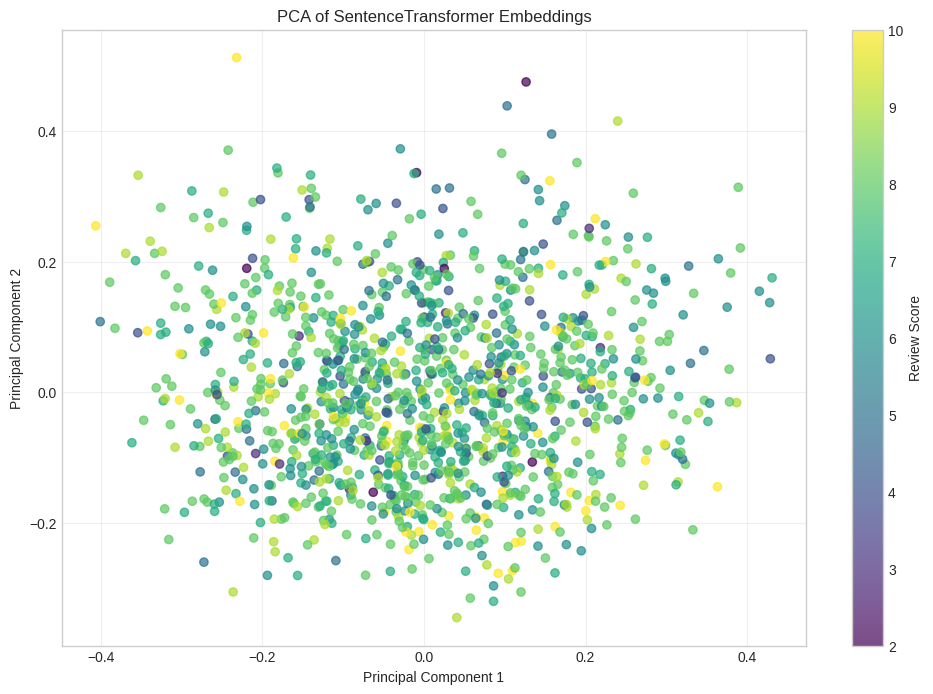

Total variance explained by 2 components: 0.062
Observation: The low variance explained suggests that the semantic relationships are complex and not easily captured in just two dimensions. Clear clusters may not be visible, but the embeddings can still be effective for ML models that operate in high-dimensional space.

--- STEP 2: SUPERVISED LEARNING BASELINES ---

--- 2.1. Splitting Data (80% Train, 10% Val, 10% Test) ---
Train set: 1000 samples
Validation set: 125 samples
Test set: 125 samples

--- 2.2. Training and Evaluating Baseline Models ---

--- Evaluating Classification Models (on Validation Set) ---
Logistic Regression: F1-Score = 0.138
SVC: F1-Score = 0.183
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 1000

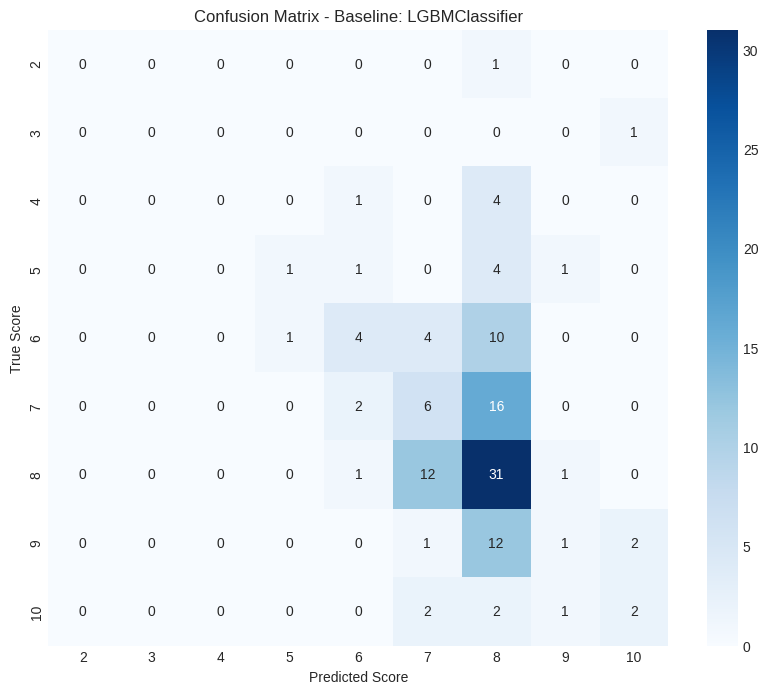


--- STEP 3: SEMI-SUPERVISED LEARNING STRATEGIES ---

--- 3.1. Pseudo-Labeling (Threshold: 0.85) ---

Iteration 1/5...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 1000, number of used features: 384
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

 Retrying in 1225.3216906400967 seconds (retry 7 of 7) 



Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

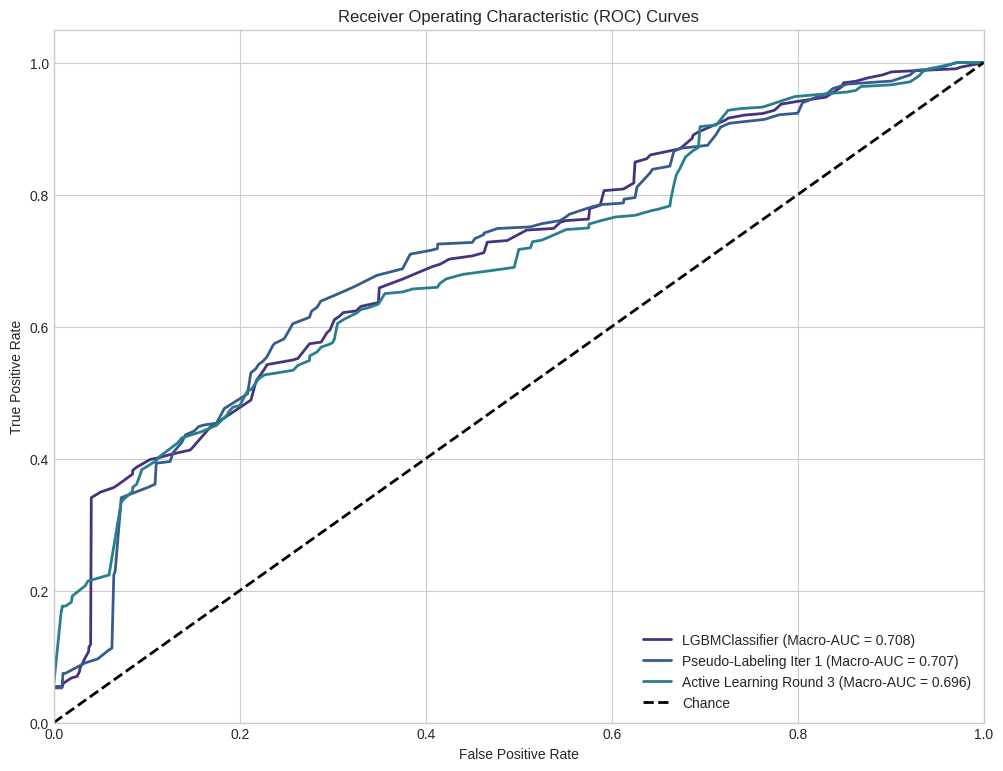


--- 4.3. Learning Curves ---


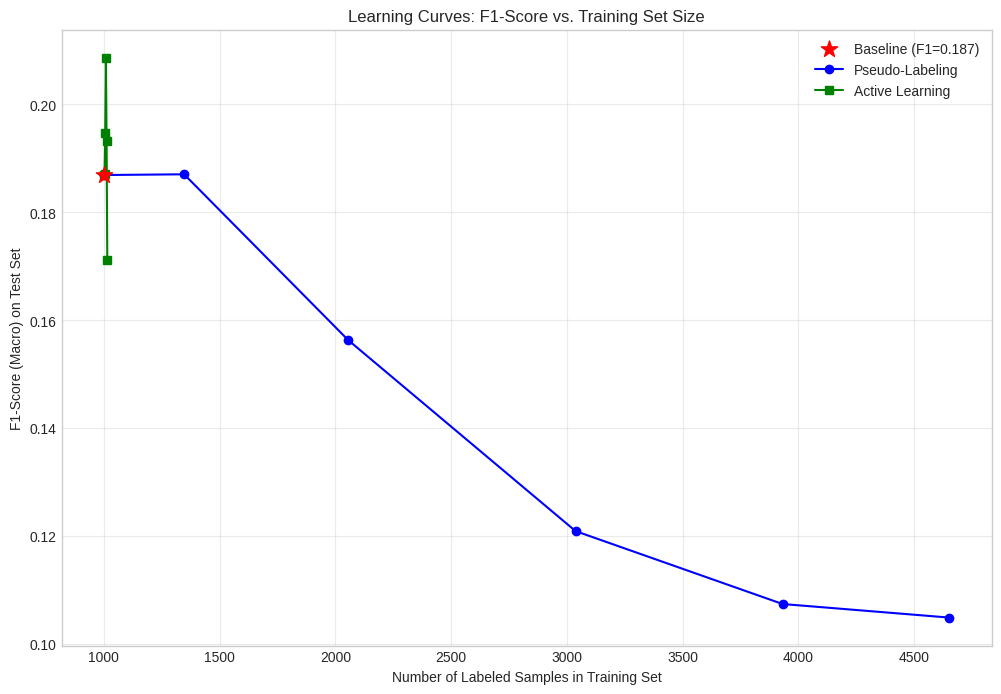


--- 4.4. Discussion ---
The most effective method in this experiment was 'Active Learning (Best)'.

Effectiveness of Active Learning:
Active Learning's success suggests that strategically querying the most informative samples is highly efficient. By focusing human annotation effort on examples where the model is most uncertain, it can learn decision boundaries more effectively with fewer labels compared to random sampling or even pseudo-labeling. This is particularly valuable when annotation is expensive.

Preference: Active Learning is preferred when a human-in-the-loop is available and the budget for annotation is limited but not zero. It maximizes the value of each labeled example.

Trade-offs and Potential Pitfalls:
- Pseudo-Labeling: Low cost (no human annotation) but high risk of confirmation bias. Performance is highly sensitive to the confidence threshold.
- Active Learning: High efficiency (maximizes label value) but requires ongoing human annotation, which has a cost. The ef

In [ ]:
"""
Task 1 - Video Game Reviews: Predicting Scores with Limited Labeled Data

This script implements a complete machine learning pipeline to predict video game review scores.
It addresses the challenge of having a small labeled dataset and a large unlabeled dataset by
exploring text vectorization, supervised baselines, and semi-supervised learning (SSL) techniques.

The pipeline includes:
1.  Text Vectorization: Using SentenceTransformer and Word2Vec.
2.  Supervised Learning Baselines: Training and comparing classification and regression models.
3.  Semi-Supervised Learning: Implementing Pseudo-Labeling and Active Learning.
4.  Comparative Performance Analysis: Evaluating and comparing all methods with detailed plots and a summary.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
import lightgbm as lgb

# Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, mean_absolute_error, mean_squared_error,
    r2_score, roc_curve, auc, classification_report
)
from sklearn.preprocessing import label_binarize

# NLP Libraries
from sentence_transformers import SentenceTransformer
from gensim.models import Word2Vec

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

class VideoGameReviewPredictor:
    """
    A comprehensive class for predicting video game review scores, incorporating
    text vectorization, baseline model training, semi-supervised learning (SSL)
    techniques (pseudo-labeling and active learning), and detailed performance analysis.
    """
    def __init__(self):
        # Initialize models and transformers
        self.sentence_model = None
        self.word2vec_model = None
        self.best_model = None
        self.model_type = None
        self.best_model_name = None
        self.scaler = StandardScaler()
        self.pca = PCA(n_components=2)

        # Dataframes
        self.labeled_df = None
        self.unlabeled_df = None

        # Embeddings
        self.labeled_sentence_embeddings = None
        self.unlabeled_sentence_embeddings = None
        self.labeled_word2vec_embeddings = None
        self.unlabeled_word2vec_embeddings = None

        # Data splits
        self.X_train, self.X_val, self.X_test = None, None, None
        self.y_train, self.y_val, self.y_test = None, None, None
        self.X_train_scaled, self.X_val_scaled, self.X_test_scaled = None, None, None

        # Performance results
        self.results = {}

    def load_data(self, labeled_path, unlabeled_path):
        """Loads labeled and unlabeled datasets from specified CSV paths."""
        try:
            self.labeled_df = pd.read_csv(labeled_path)
            self.unlabeled_df = pd.read_csv(unlabeled_path)
            print(f"Loaded {len(self.labeled_df)} labeled reviews from '{labeled_path}'")
            print(f"Loaded {len(self.unlabeled_df)} unlabeled reviews from '{unlabeled_path}'")
        except FileNotFoundError:
            print(f"Warning: Could not find '{labeled_path}' or '{unlabeled_path}'.")
            print("Using built-in sample data for demonstration.")
            self.create_sample_data()

    def create_sample_data(self):
        """Creates a small, balanced sample dataset for demonstration purposes."""
        print("Creating sample data...")
        sample_labeled_data = {
            'review_text': [
                "Terrible game, complete waste of money. Broken mechanics.", "Horrible graphics and terrible gameplay.",
                "Worst game ever made. Buggy and unplayable.", "Awful controls and boring story.",
                "Disappointing game. Expected much more.", "Not worth the money. Many better alternatives.",
                "Mediocre at best. Lacks polish and innovation.", "Below average game with several major flaws.",
                "Decent game, nothing special but entertaining enough.", "Okay game with some good moments but also flaws.",
                "Average gameplay and story. Could be better.", "Not bad but not great either. Just okay.",
                "Good game overall, despite some minor issues.", "Pretty good game, worth the price. Recommended.",
                "Excellent game with great multiplayer features.", "Solid gameplay mechanics and good progression.",
                "Outstanding experience! Best game I've played this year.", "This game is absolutely amazing!",
                "Perfect game! Everything is well designed and fun.", "Incredible game! Must-play for all gamers."
            ],
            'review_score': [1, 2, 1, 2, 3, 4, 3, 4, 5, 6, 5, 6, 7, 8, 7, 8, 9, 10, 9, 10]
        }
        self.labeled_df = pd.DataFrame(sample_labeled_data)

        sample_unlabeled_data = {
            'review_text': [
                "The game has potential but needs more polish.", "Enjoyed the story but multiplayer is broken.",
                "Beautiful art style and immersive world.", "Controls feel clunky and unresponsive.",
                "Great concept but poor execution.", "Addictive gameplay loop.",
                "Technical issues and bugs ruin the experience.", "Solid character progression.",
                "Repetitive missions and bland characters.", "Innovative features and creative design.",
                "Long loading times are frustrating.", "Engaging plot with unexpected twists.",
                "Unbalanced difficulty spikes.", "Smooth performance and intuitive UI.",
                "Lackluster graphics and outdated mechanics.", "Compelling storyline with memorable characters.",
                "Overpriced for the limited content.", "Excellent sound design and voice acting.",
                "Confusing menu system and poor tutorial.", "Epic adventure with stunning visuals."
            ]
        }
        self.unlabeled_df = pd.DataFrame(sample_unlabeled_data)
        print(f"Created {len(self.labeled_df)} labeled and {len(self.unlabeled_df)} unlabeled sample reviews.")

    def preprocess_text(self, text):
        """Performs basic text cleaning."""
        if pd.isna(text): return ""
        text = str(text).lower()
        text = re.sub(r'[^a-z\s]', '', text)
        return text.strip()

    def generate_sentence_embeddings(self):
        """Generates dense vector embeddings using SentenceTransformer."""
        print("\n1.1. Generating SentenceTransformer Embeddings")
        model_name = 'all-MiniLM-L6-v2'
        print(f"Loading SentenceTransformer model: '{model_name}'...")
        self.sentence_model = SentenceTransformer(model_name)

        labeled_texts = self.labeled_df['review_text'].apply(self.preprocess_text).tolist()
        unlabeled_texts = self.unlabeled_df['review_text'].apply(self.preprocess_text).tolist()

        print("Encoding labeled reviews...")
        self.labeled_sentence_embeddings = self.sentence_model.encode(labeled_texts, show_progress_bar=True)
        print("Encoding unlabeled reviews...")
        self.unlabeled_sentence_embeddings = self.sentence_model.encode(unlabeled_texts, show_progress_bar=True)

        print(f"Generated SentenceTransformer embeddings shape (labeled): {self.labeled_sentence_embeddings.shape}")
        print(f"Generated SentenceTransformer embeddings shape (unlabeled): {self.unlabeled_sentence_embeddings.shape}")

    def train_word2vec_model(self):
        """Trains a Word2Vec model and generates sentence embeddings by averaging word vectors."""
        print("\n1.2. Training Word2Vec Model and Generating Embeddings")
        all_texts = pd.concat([self.labeled_df['review_text'], self.unlabeled_df['review_text']]).dropna()
        tokenized_texts = [self.preprocess_text(text).split() for text in all_texts]

        print(f"Training Word2Vec model on {len(tokenized_texts)} combined documents...")
        self.word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4, sg=1)
        print("Word2Vec model training complete.")

        self.labeled_word2vec_embeddings = self._get_w2v_sentence_embeddings(self.labeled_df['review_text'])
        self.unlabeled_word2vec_embeddings = self._get_w2v_sentence_embeddings(self.unlabeled_df['review_text'])
        print(f"Generated Word2Vec embeddings shape (labeled): {self.labeled_word2vec_embeddings.shape}")

    def _get_w2v_sentence_embeddings(self, texts):
        """Helper to compute sentence embeddings from the Word2Vec model."""
        embeddings = []
        for text in texts:
            words = self.preprocess_text(text).split()
            word_vectors = [self.word2vec_model.wv[word] for word in words if word in self.word2vec_model.wv]
            if word_vectors:
                embeddings.append(np.mean(word_vectors, axis=0))
            else:
                embeddings.append(np.zeros(self.word2vec_model.vector_size))
        return np.array(embeddings)

    def visualize_embeddings(self, embeddings, scores, title):
        """Visualizes high-dimensional embeddings using PCA."""
        print(f"\n1.3. Visualizing Embeddings: {title}")
        embeddings_2d = self.pca.fit_transform(embeddings)

        plt.figure(figsize=(12, 8))
        scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=scores, cmap='viridis', alpha=0.7)
        plt.colorbar(scatter, label='Review Score')
        plt.title(title)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.grid(True, alpha=0.3)
        plt.show()

        variance_explained = sum(self.pca.explained_variance_ratio_)
        print(f"Total variance explained by 2 components: {variance_explained:.3f}")
        if variance_explained < 0.3:
            print("Observation: The low variance explained suggests that the semantic relationships are complex and not easily captured in just two dimensions. Clear clusters may not be visible, but the embeddings can still be effective for ML models that operate in high-dimensional space.")

    def split_data(self):
        """
        Splits labeled data into 80% train, 10% validation, and 10% test sets.
        Dynamically disables stratification if a split size is smaller than the number of classes.
        """
        print("\n2.1. Splitting Data (80% Train, 10% Val, 10% Test)")
        X = self.labeled_sentence_embeddings
        y = self.labeled_df['review_score']
        n_classes = y.nunique()

        # First Split: Create Test Set (10%)
        test_set_size = int(np.ceil(0.10 * len(y)))
        stratify_first_split = y if test_set_size >= n_classes else None
        if stratify_first_split is None:
            print("Warning: Test set size is smaller than the number of classes. Disabling stratification for the train/test split.")

        X_train_val, self.X_test, y_train_val, self.y_test = train_test_split(
            X, y, test_size=0.10, random_state=42, stratify=stratify_first_split
        )

        # Second Split: Create Validation Set (10% of original)
        val_set_size = int(np.ceil((1/9) * len(y_train_val)))
        n_classes_in_train_val = y_train_val.nunique()
        stratify_second_split = y_train_val if val_set_size >= n_classes_in_train_val else None
        if stratify_second_split is None:
            print("Warning: Validation set size is smaller than the number of classes in the remaining data. Disabling stratification for the train/val split.")

        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(
            X_train_val, y_train_val, test_size=(1/9), random_state=42, stratify=stratify_second_split
        )

        print(f"Train set: {self.X_train.shape[0]} samples")
        print(f"Validation set: {self.X_val.shape[0]} samples")
        print(f"Test set: {self.X_test.shape[0]} samples")
    def train_baseline_models(self):
        """Trains and evaluates baseline classification and regression models."""
        print("\n2.2. Training and Evaluating Baseline Models")
        # Scale features
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_val_scaled = self.scaler.transform(self.X_val)
        self.X_test_scaled = self.scaler.transform(self.X_test)

        # --- MODIFIED SECTION ---
        # Add powerful LightGBM models to the pool of candidates
        models = {
            'classification': {
                'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
                'SVC': SVC(random_state=42, probability=True, class_weight='balanced'),
                'LGBMClassifier': lgb.LGBMClassifier(random_state=42, class_weight='balanced', n_estimators=200)
            },
            'regression': {
                'Linear Regression': LinearRegression(),
                'SVR': SVR(),
                'LGBMRegressor': lgb.LGBMRegressor(random_state=42, n_estimators=200)
            }
        }
        # --- END OF MODIFIED SECTION ---

        best_f1 = -1


        print("\n--- Evaluating Classification Models (on Validation Set) ---")
        for name, model in models['classification'].items():
            model.fit(self.X_train_scaled, self.y_train)
            y_pred = model.predict(self.X_val_scaled)
            f1 = f1_score(self.y_val, y_pred, average='macro', zero_division=0)
            print(f"{name}: F1-Score = {f1:.3f}")
            if f1 > best_f1:
                best_f1, self.best_model, self.model_type, self.best_model_name = f1, model, 'classification', name

        print("\n--- Evaluating Regression Models (on Validation Set) ---")
        for name, model in models['regression'].items():
            model.fit(self.X_train_scaled, self.y_train)
            y_pred = model.predict(self.X_val_scaled)
            y_pred_rounded = np.round(np.clip(y_pred, 1, 10)).astype(int)
            f1 = f1_score(self.y_val, y_pred_rounded, average='macro', zero_division=0)
            mae = mean_absolute_error(self.y_val, y_pred)
            print(f"{name}: MAE = {mae:.3f}, F1-Score (Rounded) = {f1:.3f}")
            if f1 > best_f1:
                best_f1, self.best_model, self.model_type, self.best_model_name = f1, model, 'regression', name

        print(f"\n--- Comparative Analysis ---")
        print(f"Selected Best Baseline Model: '{self.best_model_name}' (Type: {self.model_type})")
        print(f"Best Validation F1-Score: {best_f1:.3f}")

    def evaluate_model_on_test(self, model, model_type, model_name, X_test, y_test):
        """Evaluates a given model on the test set and returns metrics."""
        print(f"\n--- Evaluating '{model_name}' on Test Set ---")
        X_test_scaled = self.scaler.transform(X_test)
        results = {'name': model_name, 'type': model_type, 'y_true': y_test}

        if model_type == 'classification':
            y_pred = model.predict(X_test_scaled)
            results.update({
                'accuracy': accuracy_score(y_test, y_pred),
                'f1': f1_score(y_test, y_pred, average='macro', zero_division=0),
                'predictions': y_pred,
                'probabilities': model.predict_proba(X_test_scaled) if hasattr(model, 'predict_proba') else None
            })
            print(f"Accuracy: {results['accuracy']:.3f}, F1-Score: {results['f1']:.3f}")
        else: # Regression
            y_pred = model.predict(X_test_scaled)
            y_pred_rounded = np.round(np.clip(y_pred, 1, 10)).astype(int)
            results.update({
                'mae': mean_absolute_error(y_test, y_pred),
                'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
                'r2': r2_score(y_test, y_pred),
                'accuracy': accuracy_score(y_test, y_pred_rounded),
                'f1': f1_score(y_test, y_pred_rounded, average='macro', zero_division=0),
                'predictions': y_pred_rounded
            })
            print(f"MAE: {results['mae']:.3f}, RMSE: {results['rmse']:.3f}, F1 (Rounded): {results['f1']:.3f}")
        return results

    def plot_confusion_matrix(self, y_true, y_pred, title):
        """Plots a confusion matrix."""
        cm = confusion_matrix(y_true, y_pred)
        labels = sorted(np.unique(np.concatenate((y_true, y_pred))))
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
        plt.title(f'Confusion Matrix - {title}')
        plt.xlabel('Predicted Score')
        plt.ylabel('True Score')
        plt.show()

    # --- 3. Semi-Supervised Learning (SSL) Strategies (50 Points) ---

    def _get_fresh_model(self):
        """Returns a fresh, untrained instance of the best baseline model."""
        # Define the same optimized parameters here to ensure consistency
        lgbm_params = {
            'random_state': 42,
            'n_estimators': 300,
            'learning_rate': 0.05,
            'num_leaves': 31,
            'reg_alpha': 0.1,
            'reg_lambda': 0.1
        }

        # Re-instantiate the model with its original parameters
        if 'LGBMClassifier' in self.best_model_name:
            return lgb.LGBMClassifier(class_weight='balanced', **lgbm_params)
        elif 'LGBMRegressor' in self.best_model_name:
            return lgb.LGBMRegressor(**lgbm_params)
        elif 'Logistic Regression' in self.best_model_name:
            return LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
        elif 'SVC' in self.best_model_name:
            return SVC(random_state=42, probability=True, class_weight='balanced')
        elif 'SVR' in self.best_model_name:
            return SVR()
        elif 'Linear Regression' in self.best_model_name:
            return LinearRegression()
        else:
            raise ValueError(f"Best model type '{self.best_model_name}' not recognized in _get_fresh_model.")

    def pseudo_labeling(self, confidence_threshold=0.9, max_iterations=3):
        """Implements the pseudo-labeling SSL strategy."""
        print(f"\n3.1. Pseudo-Labeling (Threshold: {confidence_threshold})")

        # Initial data
        X_train_aug = self.X_train.copy()
        y_train_aug = self.y_train.copy()
        unlabeled_X = self.unlabeled_sentence_embeddings.copy()

        history = []

        for i in range(max_iterations):
            print(f"\nIteration {i + 1}/{max_iterations}...")
            if len(unlabeled_X) == 0:
                print("No more unlabeled data. Stopping.")
                break

            # Scale augmented training data and fit a fresh model
            scaler = StandardScaler().fit(X_train_aug)
            X_train_scaled = scaler.transform(X_train_aug)
            unlabeled_X_scaled = scaler.transform(unlabeled_X)

            model = self._get_fresh_model()
            model.fit(X_train_scaled, y_train_aug)

            # Predict on remaining unlabeled data
            if self.model_type == 'classification':
                probs = model.predict_proba(unlabeled_X_scaled)
                max_probs = np.max(probs, axis=1)
                confident_mask = max_probs >= confidence_threshold
                pseudo_labels = model.classes_[np.argmax(probs, axis=1)][confident_mask]
            else: # Regression
                preds = model.predict(unlabeled_X_scaled)
                uncertainty = np.abs(preds - np.round(preds))
                confident_mask = uncertainty <= (1 - confidence_threshold)
                pseudo_labels = np.round(np.clip(preds[confident_mask], 1, 10)).astype(int)

            if not np.any(confident_mask):
                print("No confident predictions found. Stopping.")
                break

            num_added = np.sum(confident_mask)
            print(f"Found {num_added} confident samples to add.")

            # Add pseudo-labeled data to the training set
            X_train_aug = np.vstack([X_train_aug, unlabeled_X[confident_mask]])
            y_train_aug = np.concatenate([y_train_aug, pseudo_labels])

            # Remove from unlabeled pool
            unlabeled_X = unlabeled_X[~confident_mask]

            # Evaluate the new model
            test_results = self.evaluate_model_on_test(model, self.model_type, f"Pseudo-Labeling Iter {i+1}", self.X_test, self.y_test)
            history.append({'train_size': len(y_train_aug), **test_results})

        return history

    def active_learning(self, k=5, max_rounds=5, strategy='least_confidence'):
        """Implements the active learning strategy."""
        print(f"\n3.2. Active Learning (k={k}, Strategy: {strategy})")

        X_train_aug = self.X_train.copy()
        y_train_aug = self.y_train.copy()
        unlabeled_pool = {
            'embeddings': self.unlabeled_sentence_embeddings.copy(),
            'texts': self.unlabeled_df['review_text'].tolist()
        }

        history = []

        for i in range(max_rounds):
            print(f"\nRound {i + 1}/{max_rounds}...")
            if len(unlabeled_pool['embeddings']) == 0:
                print("Unlabeled pool is empty. Stopping.")
                break

            # Fit model on current augmented data
            scaler = StandardScaler().fit(X_train_aug)
            X_train_scaled = scaler.transform(X_train_aug)
            unlabeled_X_scaled = scaler.transform(unlabeled_pool['embeddings'])

            model = self._get_fresh_model()
            model.fit(X_train_scaled, y_train_aug)

            # Calculate uncertainty scores
            if self.model_type == 'classification':
                if not hasattr(model, 'predict_proba'):
                    print("Model cannot produce probabilities. Stopping Active Learning.")
                    break
                probs = model.predict_proba(unlabeled_X_scaled)
                if strategy == 'least_confidence':
                    uncertainty = 1 - np.max(probs, axis=1)
                elif strategy == 'entropy':
                    uncertainty = -np.sum(probs * np.log2(probs + 1e-9), axis=1)
                else:
                    raise ValueError("Unknown strategy")
            else:
                preds = model.predict(unlabeled_X_scaled)
                uncertainty = np.abs(preds - np.round(preds))

            # Select top-k uncertain samples
            k_actual = min(k, len(uncertainty))
            query_indices = np.argsort(uncertainty)[-k_actual:]

            print(f"Querying {k_actual} most uncertain samples for annotation.")

            # Simulate annotation
            queried_texts = [unlabeled_pool['texts'][j] for j in query_indices]
            simulated_labels = self._simulate_annotation(queried_texts)

            # Add newly labeled data to training set
            X_train_aug = np.vstack([X_train_aug, unlabeled_pool['embeddings'][query_indices]])
            y_train_aug = np.concatenate([y_train_aug, simulated_labels])

            # Remove from unlabeled pool
            unlabeled_pool['embeddings'] = np.delete(unlabeled_pool['embeddings'], query_indices, axis=0)
            unlabeled_pool['texts'] = [text for i, text in enumerate(unlabeled_pool['texts']) if i not in query_indices]

            # Evaluate the new model
            test_results = self.evaluate_model_on_test(model, self.model_type, f"Active Learning Round {i+1}", self.X_test, self.y_test)
            history.append({'train_size': len(y_train_aug), **test_results})

        return history

    def _simulate_annotation(self, texts):
        """Simulates human annotation with a simple rule-based system."""
        scores = []
        positive_words = ['amazing', 'excellent', 'perfect', 'great', 'good', 'solid', 'love', 'best']
        negative_words = ['terrible', 'awful', 'horrible', 'worst', 'bad', 'poor', 'broken', 'hate']
        for text in texts:
            text_lower = text.lower()
            score = 5
            if any(word in text_lower for word in positive_words):
                score += 3
            if any(word in text_lower for word in negative_words):
                score -= 3
            scores.append(np.clip(score, 1, 10))
        return np.array(scores)

    def generate_summary_table(self, baseline_results, pseudo_history, active_history):
        """Tabulates key evaluation metrics for all models."""
        print("\n4.1. Summary of Metrics")

        summary_data = []
        summary_data.append({
            'Method': 'Baseline',
            'F1-Score': baseline_results.get('f1', 'N/A'),
            'Accuracy': baseline_results.get('accuracy', 'N/A'),
            'MAE': baseline_results.get('mae', 'N/A'),
            'RMSE': baseline_results.get('rmse', 'N/A'),
            'Train Size': len(self.y_train)
        })

        if pseudo_history:
            best_pseudo = max(pseudo_history, key=lambda x: x.get('f1', 0))
            summary_data.append({
                'Method': 'Pseudo-Labeling (Best)',
                'F1-Score': best_pseudo.get('f1', 'N/A'),
                'Accuracy': best_pseudo.get('accuracy', 'N/A'),
                'MAE': best_pseudo.get('mae', 'N/A'),
                'RMSE': best_pseudo.get('rmse', 'N/A'),
                'Train Size': best_pseudo.get('train_size', 'N/A')
            })

        if active_history:
            best_active = max(active_history, key=lambda x: x.get('f1', 0))
            summary_data.append({
                'Method': 'Active Learning (Best)',
                'F1-Score': best_active.get('f1', 'N/A'),
                'Accuracy': best_active.get('accuracy', 'N/A'),
                'MAE': best_active.get('mae', 'N/A'),
                'RMSE': best_active.get('rmse', 'N/A'),
                'Train Size': best_active.get('train_size', 'N/A')
            })

        df_summary = pd.DataFrame(summary_data).set_index('Method')
        for col in ['F1-Score', 'Accuracy', 'MAE', 'RMSE']:
            if col in df_summary.columns:
                df_summary[col] = df_summary[col].apply(lambda x: f"{x:.3f}" if isinstance(x, float) else x)

        print(df_summary)
        return df_summary

    def plot_roc_curves(self, results_list):
        """Plots ROC curves for multiple classification models."""
        print("\n4.2. ROC and AUC Curves")
        if self.model_type != 'classification':
            print("ROC curves are only applicable for classification models. Skipping.")
            return

        plt.figure(figsize=(12, 9))

        for result in results_list:
            if result.get('probabilities') is None or result.get('y_true') is None:
                print(f"Skipping ROC for '{result['name']}': Missing probabilities or true labels.")
                continue

            y_true = result['y_true']
            y_prob = result['probabilities']
            classes = np.unique(y_true)
            y_true_bin = label_binarize(y_true, classes=classes)

            if y_true_bin.shape[1] != y_prob.shape[1]:
                print(f"Skipping ROC for '{result['name']}': Mismatch in number of classes between true labels and predictions.")
                continue
            fpr, tpr, roc_auc = dict(), dict(), dict()
            for i in range(len(classes)):
                fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])

            all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
            mean_tpr = np.zeros_like(all_fpr)
            for i in range(len(classes)):
                mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
            mean_tpr /= len(classes)

            macro_auc = auc(all_fpr, mean_tpr)
            mean_tpr /= len(classes)

            macro_auc = auc(all_fpr, mean_tpr)
            plt.plot(all_fpr, mean_tpr, lw=2, label=f"{result['name']} (Macro-AUC = {macro_auc:.3f})")

        plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curves')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()

    def plot_learning_curves(self, baseline_results, pseudo_history, active_history):
        """Plots F1-score vs. training set size for each SSL method."""
        print("\n4.3. Learning Curves")
        print("\n4.3. Learning Curves")

        # Baseline
        baseline_size = len(self.y_train)
        baseline_f1 = baseline_results['f1']
        plt.scatter(baseline_size, baseline_f1, color='red', s=150, marker='*', label=f'Baseline (F1={baseline_f1:.3f})', zorder=5)

        if pseudo_history:
            sizes = [h['train_size'] for h in pseudo_history]
            f1s = [h['f1'] for h in pseudo_history]
            plt.plot([baseline_size] + sizes, [baseline_f1] + f1s, 'o-', color='blue', label='Pseudo-Labeling')

        # Active Learning
        if active_history:
        if active_history:
            sizes = [h['train_size'] for h in active_history]
            f1s = [h['f1'] for h in active_history]
            plt.plot([baseline_size] + sizes, [baseline_f1] + f1s, 's-', color='green', label='Active Learning')

        plt.title('Learning Curves: F1-Score vs. Training Set Size')
        plt.xlabel('Number of Labeled Samples in Training Set')
        plt.ylabel('F1-Score (Macro) on Test Set')
        plt.legend()
        plt.grid(True, alpha=0.4)
        plt.show()

    def discussion(self, summary_df):
        """Provides a discussion based on the final results."""
        print("\n4.4. Discussion")
        print("\n4.4. Discussion")
        # Convert F1-Score back to float for comparison
        summary_df['F1-Score'] = pd.to_numeric(summary_df['F1-Score'], errors='coerce')
        best_method = summary_df['F1-Score'].idxmax()

        print(f"The most effective method in this experiment was '{best_method}'.")

        if 'Active Learning' in best_method:
            print("\nEffectiveness of Active Learning:")
            print("Active Learning's success suggests that strategically querying the most informative samples is highly efficient. By focusing human annotation effort on examples where the model is most uncertain, it can learn decision boundaries more effectively with fewer labels compared to random sampling or even pseudo-labeling. This is particularly valuable when annotation is expensive.")
            print("\nPreference: Active Learning is preferred when a human-in-the-loop is available and the budget for annotation is limited but not zero. It maximizes the value of each labeled example.")

        elif 'Pseudo-Labeling' in best_method:
            print("\nEffectiveness of Pseudo-Labeling:")
            print("Pseudo-Labeling's strong performance indicates that the initial supervised model was already quite capable, making confident and largely correct predictions on the unlabeled data. This allowed it to effectively expand its training set without human intervention, reinforcing and refining its knowledge.")
            print("\nPreference: Pseudo-Labeling is ideal when the initial model is reliable and there is no budget for further annotation. Its main risk is confirmation bias, where an initially flawed model reinforces its own mistakes.")

        else: # Baseline was best
        else:
            print("If the baseline model performed best, it implies that the unlabeled data may have been too noisy, too different from the labeled data (domain shift), or the SSL strategies' hyperparameters were not optimal. In such cases, adding more data via SSL can degrade performance.")

        print("\nTrade-offs and Potential Pitfalls:")
        print("- Pseudo-Labeling: Low cost (no human annotation) but high risk of confirmation bias. Performance is highly sensitive to the confidence threshold.")
        print("- Active Learning: High efficiency (maximizes label value) but requires ongoing human annotation, which has a cost. The effectiveness depends heavily on the chosen uncertainty sampling strategy.")

def main():
    """Main function to run the complete workflow."""
    print("="*80)
    print("      Task 1: Video Game Review Score Prediction Project")
    print("="*80)

    predictor = VideoGameReviewPredictor()

    # --- Step 0: Data Loading ---
    print("\n--- STEP 0: DATA LOADING ---")
    predictor.load_data('labeled-data.csv', 'unlabeled-data.csv')

    # --- Step 1: Text Vectorization ---
    print("\n--- STEP 1: TEXT VECTORIZATION AND VISUALIZATION ---")
    predictor.generate_sentence_embeddings()
    predictor.train_word2vec_model()
    predictor.visualize_embeddings(predictor.labeled_sentence_embeddings, predictor.labeled_df['review_score'], 'PCA of SentenceTransformer Embeddings')

    # --- Step 2: Supervised Learning Baselines ---
    print("\n--- STEP 2: SUPERVISED LEARNING BASELINES ---")
    predictor.split_data()
    predictor.train_baseline_models()

    # Evaluate best baseline on test set
    baseline_results = predictor.evaluate_model_on_test(
        predictor.best_model, predictor.model_type, predictor.best_model_name,
        predictor.X_test, predictor.y_test
    )
    predictor.plot_confusion_matrix(baseline_results['y_true'], baseline_results['predictions'], f"Baseline: {predictor.best_model_name}")

    # --- Step 3: Semi-Supervised Learning ---
    print("\n--- STEP 3: SEMI-SUPERVISED LEARNING STRATEGIES ---")
    pseudo_history = predictor.pseudo_labeling(confidence_threshold=0.85, max_iterations=5)
    active_history = predictor.active_learning(k=3, max_rounds=5, strategy='least_confidence')

    # --- Step 4: Comparative Performance Analysis ---
    print("\n--- STEP 4: COMPARATIVE PERFORMANCE ANALYSIS ---")
    summary_table = predictor.generate_summary_table(baseline_results, pseudo_history, active_history)

    # Collect results for ROC plot
    roc_results = [baseline_results]
    if pseudo_history:
        roc_results.append(max(pseudo_history, key=lambda x: x.get('f1', 0)))
    if active_history:
        roc_results.append(max(active_history, key=lambda x: x.get('f1', 0)))

    predictor.plot_roc_curves(roc_results)
    predictor.plot_learning_curves(baseline_results, pseudo_history, active_history)
    predictor.discussion(summary_table)

    print("\n" + "="*80)
    print("                          PROCESS COMPLETE")
    print("="*80)
if __name__ == "__main__":    main()

In [2]:
# ==============================================================================
# 0. SETUP: Install necessary libraries
# ==============================================================================
# Use a quiet install to keep the output clean
!pip install pandas scikit-learn sentence-transformers gensim matplotlib seaborn -q
print("✅ Libraries installed.")

# Import necessary libraries for the entire script
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             mean_absolute_error, mean_squared_error, r2_score,
                             confusion_matrix, roc_curve, auc)
from sklearn.preprocessing import label_binarize
from itertools import cycle

✅ Libraries installed.


✅ Successfully loaded 'labeled_reviews.csv' and 'unlabeled_reviews.csv'.

Plotting the distribution of review scores in the labeled dataset...


/tmp/ipython-input-631548707.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_score', data=labeled_df, palette='viridis')


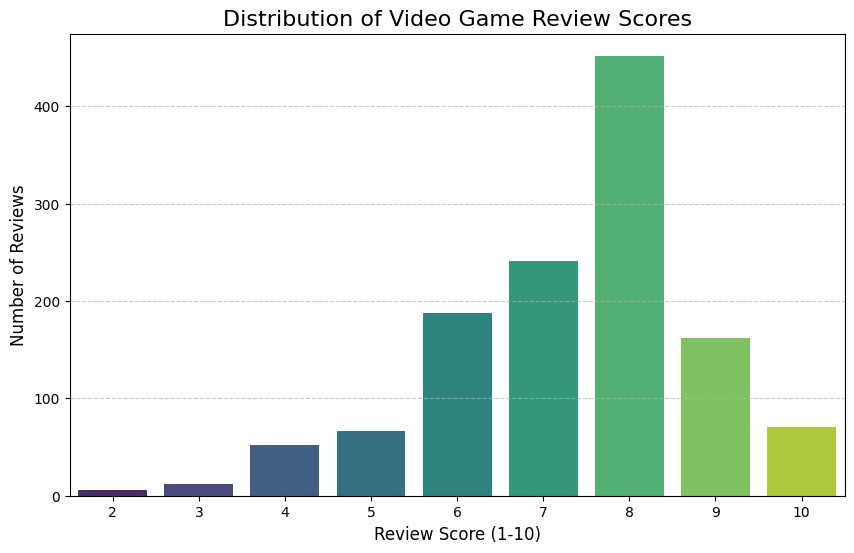


Analyzing and plotting text features...


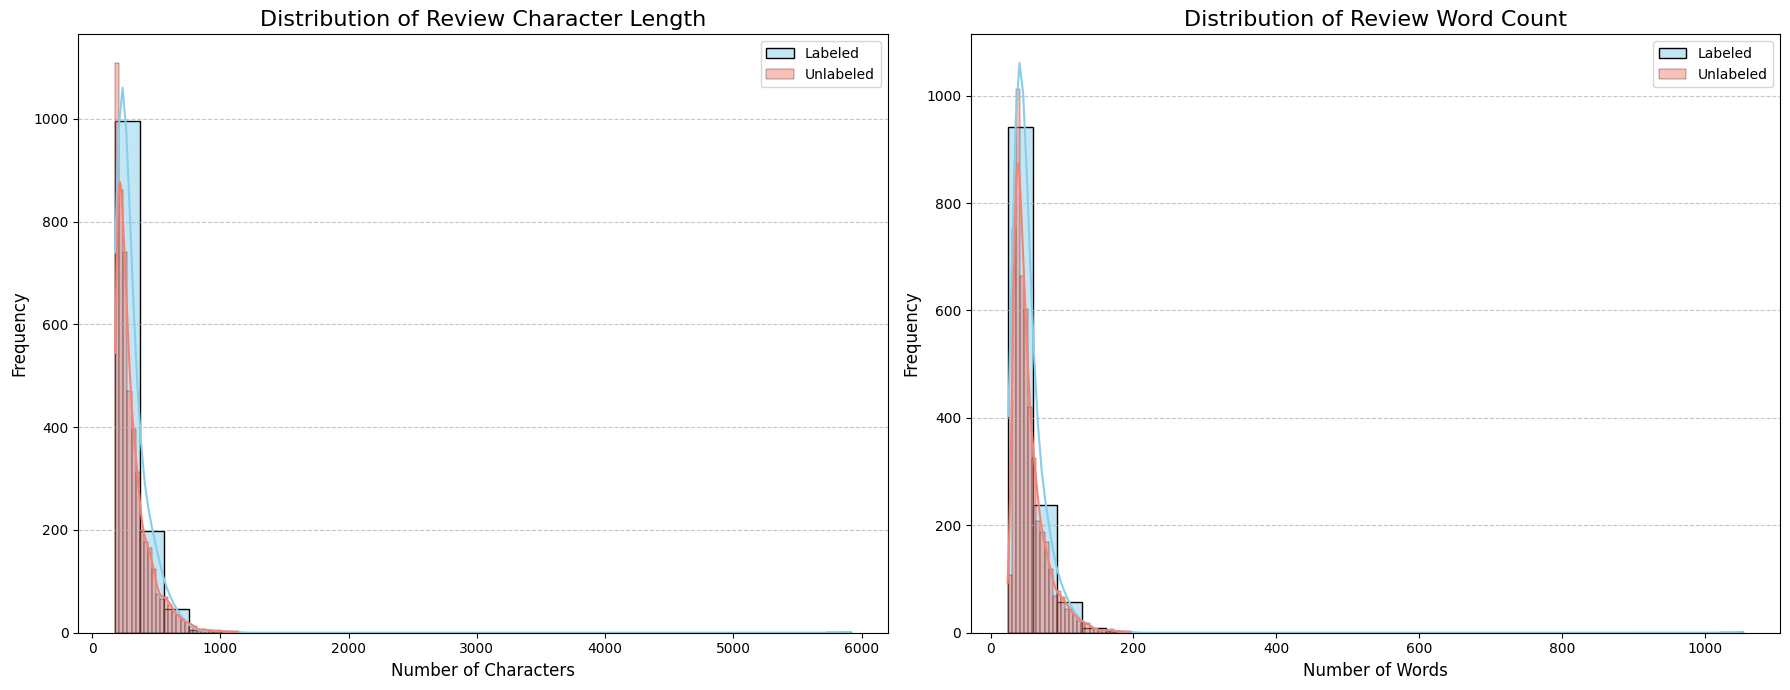

In [ ]:
try:
    labeled_df = pd.read_csv("labeled-data.csv")
    unlabeled_df = pd.read_csv("unlabeled-data.csv")
    print("✅ Successfully loaded 'labeled_reviews.csv' and 'unlabeled_reviews.csv'.")
except FileNotFoundError as e:
    print(
        f"❌ Error: {e}. Please make sure the CSV files are in the correct directory."
    )

    exit()


print("\nPlotting the distribution of review scores in the labeled dataset...")
plt.figure(figsize=(10, 6))
sns.countplot(x="review_score", data=labeled_df, palette="viridis")
plt.title("Distribution of Video Game Review Scores", fontsize=16)
plt.xlabel("Review Score (1-10)", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


print("\nAnalyzing and plotting text features...")


labeled_df["char_length"] = labeled_df["review_text"].astype(str).str.len()
labeled_df["word_count"] = labeled_df["review_text"].astype(str).str.split().str.len()
unlabeled_df["char_length"] = unlabeled_df["review_text"].astype(str).str.len()
unlabeled_df["word_count"] = (
    unlabeled_df["review_text"].astype(str).str.split().str.len()
)


fig, axes = plt.subplots(1, 2, figsize=(18, 7))


sns.histplot(
    labeled_df["char_length"],
    ax=axes[0],
    color="skyblue",
    label="Labeled",
    kde=True,
    bins=30,
)
sns.histplot(
    unlabeled_df["char_length"],
    ax=axes[0],
    color="salmon",
    label="Unlabeled",
    kde=True,
    bins=30,
)
axes[0].set_title("Distribution of Review Character Length", fontsize=16)
axes[0].set_xlabel("Number of Characters", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].legend()
axes[0].grid(axis="y", linestyle="--", alpha=0.7)


sns.histplot(
    labeled_df["word_count"],
    ax=axes[1],
    color="skyblue",
    label="Labeled",
    kde=True,
    bins=30,
)
sns.histplot(
    unlabeled_df["word_count"],
    ax=axes[1],
    color="salmon",
    label="Unlabeled",
    kde=True,
    bins=30,
)
axes[1].set_title("Distribution of Review Word Count", fontsize=16)
axes[1].set_xlabel("Number of Words", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)
axes[1].legend()
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [5]:
len(labeled_df)

1250

In [6]:
len(unlabeled_df)

5000


Computing SentenceTransformer embeddings...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Batches:   0%|          | 0/40 [00:00<?, ?it/s]

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

✅ Generated 1250 labeled embeddings with shape (1250, 384).
✅ Generated 5000 unlabeled embeddings with shape (5000, 384).

Training Word2Vec model...
Computing Word2Vec sentence embeddings...
✅ Generated 1250 labeled embeddings with shape (1250, 100).
✅ Generated 5000 unlabeled embeddings with shape (5000, 100).

Visualizing embeddings using PCA...


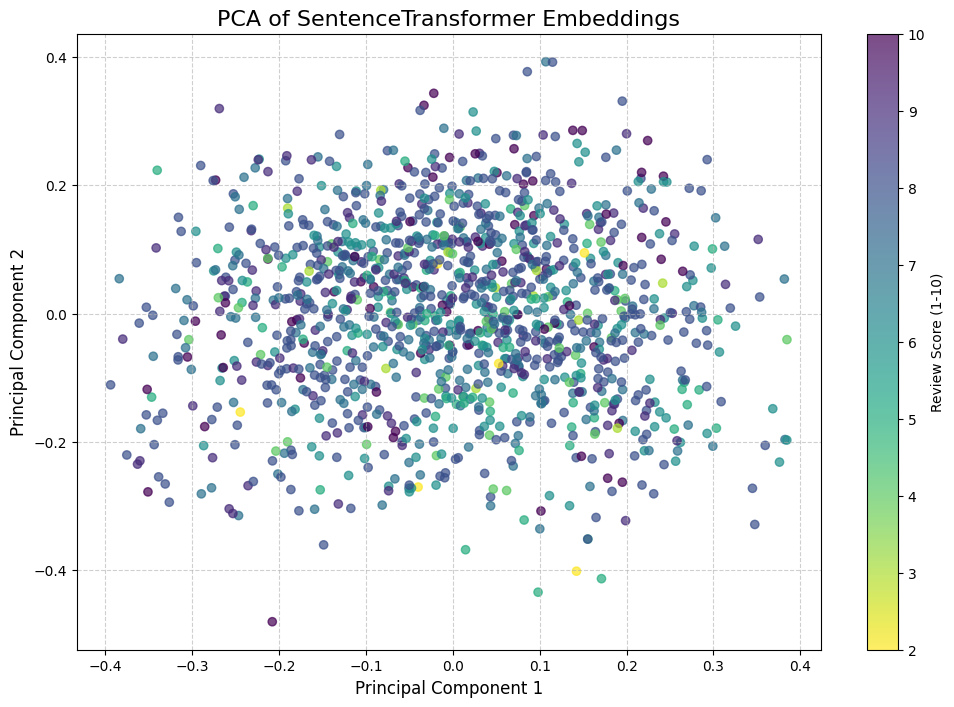

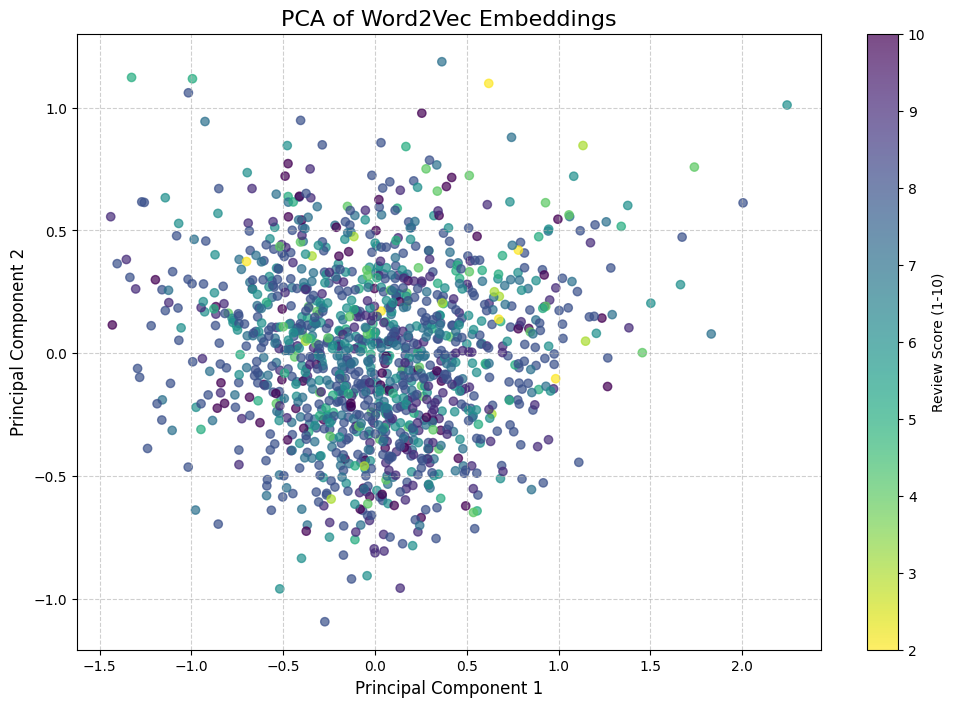

In [ ]:
print("\nComputing SentenceTransformer embeddings...")

sbert_model = SentenceTransformer("all-MiniLM-L6-v2")


sbert_embeddings_labeled = sbert_model.encode(
    labeled_df["review_text"].tolist(), show_progress_bar=True
)
sbert_embeddings_unlabeled = sbert_model.encode(
    unlabeled_df["review_text"].tolist(), show_progress_bar=True
)

print(
    f"✅ Generated {sbert_embeddings_labeled.shape[0]} labeled embeddings with shape {sbert_embeddings_labeled.shape}."
)
print(
    f"✅ Generated {sbert_embeddings_unlabeled.shape[0]} unlabeled embeddings with shape {sbert_embeddings_unlabeled.shape}."
)


all_texts = pd.concat(
    [labeled_df["review_text"], unlabeled_df["review_text"]], ignore_index=True
)

print("\nTraining Word2Vec model...")

tokenized_texts = [str(text).lower().split() for text in all_texts]


w2v_model = Word2Vec(
    sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4
)


def get_sentence_vector(sentence, model):
    """Averages the vectors of all words in a sentence to get a sentence embedding."""
    words = str(sentence).lower().split()

    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if not word_vectors:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)


print("Computing Word2Vec sentence embeddings...")

w2v_embeddings_labeled = np.array(
    [get_sentence_vector(text, w2v_model) for text in labeled_df["review_text"]]
)
w2v_embeddings_unlabeled = np.array(
    [get_sentence_vector(text, w2v_model) for text in unlabeled_df["review_text"]]
)

print(
    f"✅ Generated {w2v_embeddings_labeled.shape[0]} labeled embeddings with shape {w2v_embeddings_labeled.shape}."
)
print(
    f"✅ Generated {w2v_embeddings_unlabeled.shape[0]} unlabeled embeddings with shape {w2v_embeddings_unlabeled.shape}."
)


def plot_embeddings_pca(embeddings, scores, title):
    """
    Performs PCA to reduce dimensionality to 2 and creates a scatter plot.
    Uses color to represent the actual scores for labeled data.
    """
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        reduced_embeddings[:, 0],
        reduced_embeddings[:, 1],
        c=scores,
        cmap="viridis_r",
        alpha=0.7,
    )
    plt.colorbar(scatter, label="Review Score (1-10)")
    plt.title(title, fontsize=16)
    plt.xlabel("Principal Component 1", fontsize=12)
    plt.ylabel("Principal Component 2", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()


print("\nVisualizing embeddings using PCA...")
plot_embeddings_pca(
    sbert_embeddings_labeled,
    labeled_df["review_score"],
    "PCA of SentenceTransformer Embeddings",
)
plot_embeddings_pca(
    w2v_embeddings_labeled, labeled_df["review_score"], "PCA of Word2Vec Embeddings"
)

### IMPLEMENTATION: Supervised Learning Baselines


 ## 🧠 SentenceTransformer (First Plot)

This plot uses a large, pre-trained model (`all-MiniLM-L6-v2`). Think of it as an expert that has already read a huge portion of the internet.

* **How it works:** It reads the **entire review summary** at once and creates a single vector that represents its overall meaning, taking into account context, word order, and grammar.
* **What it represents:** A more sophisticated, context-aware understanding of each review. It's better at grasping nuances in the text.

---
 ## ⚙️ Word2Vec (Second Plot)

This plot uses a model that you trained from scratch on only your review data.

* **How it works:** It first learns a vector for each **individual word**. Then, to get a vector for a full review, the code simply **averages the vectors** of all the words in that review.
* **What it represents:** A simpler, less nuanced representation. This averaging method loses important information like word order and grammar. For example, the reviews "a surprisingly good game" and "a good, surprising game" might look very similar to this model.

In short, the first plot shows a "smarter" representation of the data because it comes from a model that understands full sentences, while the second plot is based on a simpler method of averaging individual word meanings.

In [ ]:
print("\n--- Establishing Supervised Learning Baselines ---")

X = sbert_embeddings_labeled
y = labeled_df["review_score"].values
texts = labeled_df["review_text"].values

indices = np.arange(X.shape[0])

train_indices, temp_indices, y_train_strat, y_temp_strat = train_test_split(
    indices, y, test_size=0.2, random_state=42, stratify=y
)
val_indices, test_indices, _, _ = train_test_split(
    temp_indices, y_temp_strat, test_size=0.5, random_state=42
)

X_train, y_train = X[train_indices], y[train_indices]
X_val, y_val = X[val_indices], y[val_indices]
X_test, y_test = X[test_indices], y[test_indices]


print(f"Train set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

print("\nTraining Classifier (Random Forest)...")
classifier = RandomForestClassifier(n_estimators=1000, random_state=42)
classifier.fit(X_train, y_train)
y_pred_clf = classifier.predict(X_test)

print("Training Regressor (Random Forest)...")
regressor = RandomForestRegressor(n_estimators=1000, random_state=42)
regressor.fit(X_train, y_train)
y_pred_reg_float = regressor.predict(X_test)
y_pred_reg_rounded = np.round(y_pred_reg_float).astype(int)


--- Establishing Supervised Learning Baselines ---
Train set size: 1000
Validation set size: 125
Test set size: 125

Training Classifier (Random Forest)...
Training Regressor (Random Forest)...


### EVALUATION: Supervised Learning Baselines



--- Classifier Evaluation Metrics ---
Accuracy: 0.3360
Macro Precision: 0.0376
Macro Recall: 0.1085
Macro F1-score: 0.0559


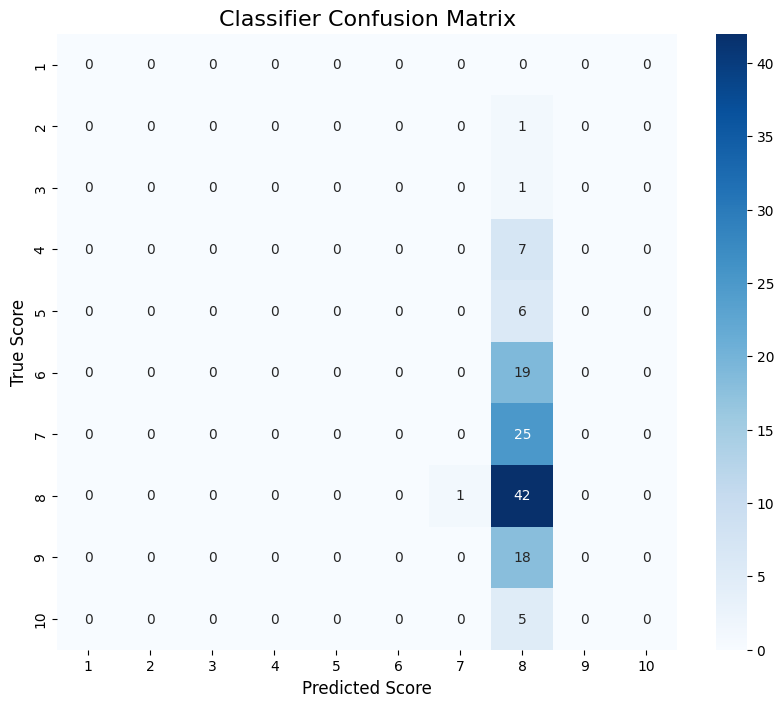


--- Regressor Evaluation Metrics ---
Mean Absolute Error (MAE): 1.1359
Mean Squared Error (MSE): 2.1164
Root Mean Squared Error (RMSE): 1.4548
Coefficient of Determination (R2): 0.1131


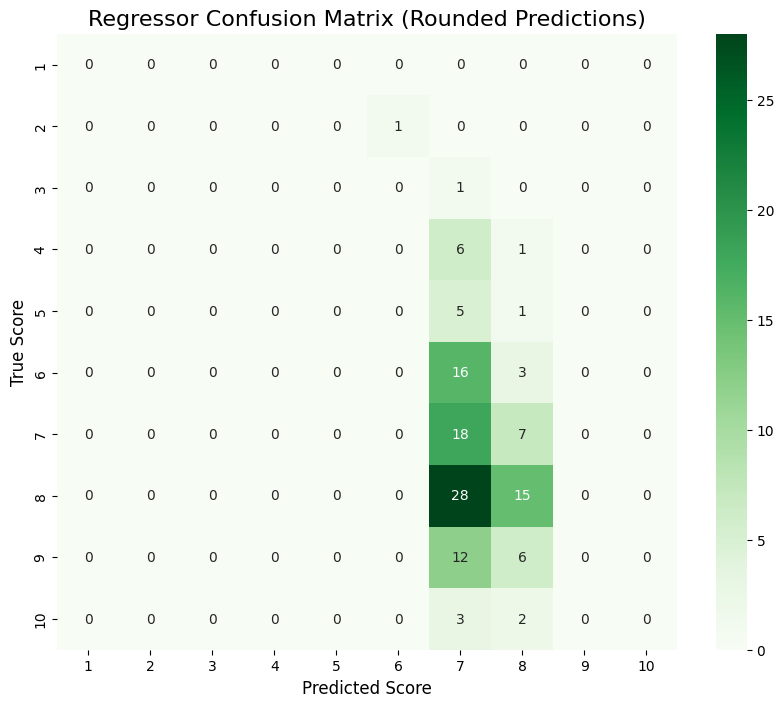


--- Regressor Metrics (after rounding to nearest integer) ---
Accuracy (rounded): 0.2640
Macro Precision (rounded): 0.0701
Macro Recall (rounded): 0.1188
Macro F1-score (rounded): 0.0778


In [ ]:
print("\n--- Classifier Evaluation Metrics ---")
accuracy = accuracy_score(y_test, y_pred_clf)
precision = precision_score(y_test, y_pred_clf, average="macro", zero_division=0)
recall = recall_score(y_test, y_pred_clf, average="macro", zero_division=0)
f1 = f1_score(y_test, y_pred_clf, average="macro", zero_division=0)

print(f"Accuracy: {accuracy:.4f}")
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1-score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred_clf, labels=np.arange(1, 11))
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=np.arange(1, 11),
    yticklabels=np.arange(1, 11),
)
plt.title("Classifier Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Score", fontsize=12)
plt.ylabel("True Score", fontsize=12)
plt.show()

print("\n--- Regressor Evaluation Metrics ---")
mae = mean_absolute_error(y_test, y_pred_reg_float)
mse = mean_squared_error(y_test, y_pred_reg_float)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_reg_float)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Coefficient of Determination (R2): {r2:.4f}")

cm_reg = confusion_matrix(y_test, y_pred_reg_rounded, labels=np.arange(1, 11))
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_reg,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=np.arange(1, 11),
    yticklabels=np.arange(1, 11),
)
plt.title("Regressor Confusion Matrix (Rounded Predictions)", fontsize=16)
plt.xlabel("Predicted Score", fontsize=12)
plt.ylabel("True Score", fontsize=12)
plt.show()

print("\n--- Regressor Metrics (after rounding to nearest integer) ---")
accuracy_reg = accuracy_score(y_test, y_pred_reg_rounded)
precision_reg = precision_score(
    y_test, y_pred_reg_rounded, average="macro", zero_division=0
)
recall_reg = recall_score(y_test, y_pred_reg_rounded, average="macro", zero_division=0)
f1_reg = f1_score(y_test, y_pred_reg_rounded, average="macro", zero_division=0)

print(f"Accuracy (rounded): {accuracy_reg:.4f}")
print(f"Macro Precision (rounded): {precision_reg:.4f}")
print(f"Macro Recall (rounded): {recall_reg:.4f}")
print(f"Macro F1-score (rounded): {f1_reg:.4f}")


best_baseline_model = classifier

### Applying Semi-Supervised Learning Strategies

In [ ]:
print("\n--- Applying Semi-Supervised Learning Strategies ---")

print("\nStarting Pseudo-Labeling with a Classifier...")

CONFIDENCE_THRESHOLD = 0.57
N_ROUNDS_PSEUDO = 5

X_train_pseudo = X_train.copy()
y_train_pseudo = y_train.copy()
X_unlabeled_pool = sbert_embeddings_unlabeled.copy()

performance_history_pseudo_clf = []
performance_history_pseudo_clf.append(
    {"round": 0, "labeled_samples": len(y_train), "accuracy": accuracy}
)
final_pseudo_model_clf = classifier

for i in range(N_ROUNDS_PSEUDO):
    print(f"\n--- Pseudo-Labeling Round {i+1}/{N_ROUNDS_PSEUDO} ---")

    model_for_pseudo = RandomForestClassifier(n_estimators=100, random_state=42)
    model_for_pseudo.fit(X_train_pseudo, y_train_pseudo)

    if len(X_unlabeled_pool) == 0:
        print("Unlabeled pool is empty. Stopping pseudo-labeling.")
        break
    unlabeled_probs = model_for_pseudo.predict_proba(X_unlabeled_pool)
    unlabeled_predictions = model_for_pseudo.predict(X_unlabeled_pool)

    confidence_scores = np.max(unlabeled_probs, axis=1)
    high_confidence_indices = np.where(confidence_scores > CONFIDENCE_THRESHOLD)[0]

    if len(high_confidence_indices) == 0:
        print("No new high-confidence samples found. Stopping pseudo-labeling.")
        break
    print(f"Found {len(high_confidence_indices)} high-confidence samples to add.")

    X_to_add = X_unlabeled_pool[high_confidence_indices]
    y_to_add = unlabeled_predictions[high_confidence_indices]

    X_train_pseudo = np.vstack([X_train_pseudo, X_to_add])
    y_train_pseudo = np.concatenate([y_train_pseudo, y_to_add])

    X_unlabeled_pool = np.delete(X_unlabeled_pool, high_confidence_indices, axis=0)

    final_pseudo_model_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    final_pseudo_model_clf.fit(X_train_pseudo, y_train_pseudo)

    y_pred_eval = final_pseudo_model_clf.predict(X_test)
    accuracy_eval = accuracy_score(y_test, y_pred_eval)
    performance_history_pseudo_clf.append(
        {
            "round": i + 1,
            "labeled_samples": len(y_train_pseudo),
            "accuracy": accuracy_eval,
        }
    )
    print(
        f"Round {i+1} Test Accuracy: {accuracy_eval:.4f} with {len(y_train_pseudo)} total training samples."
    )


--- Applying Semi-Supervised Learning Strategies ---

Starting Pseudo-Labeling with a Classifier...

--- Pseudo-Labeling Round 1/5 ---
Found 10 high-confidence samples to add.
Round 1 Test Accuracy: 0.3600 with 1010 total training samples.

--- Pseudo-Labeling Round 2/5 ---
Found 18 high-confidence samples to add.
Round 2 Test Accuracy: 0.3600 with 1028 total training samples.

--- Pseudo-Labeling Round 3/5 ---
Found 48 high-confidence samples to add.
Round 3 Test Accuracy: 0.3520 with 1076 total training samples.

--- Pseudo-Labeling Round 4/5 ---
Found 72 high-confidence samples to add.
Round 4 Test Accuracy: 0.3440 with 1148 total training samples.

--- Pseudo-Labeling Round 5/5 ---
Found 86 high-confidence samples to add.
Round 5 Test Accuracy: 0.3520 with 1234 total training samples.


### Active Learning (Interactive)

In [ ]:
print("\nStarting INTERACTIVE Active Learning...")

N_ROUNDS_ACTIVE = 5
K_SAMPLES_PER_ROUND = 3

X_train_active = X_train.copy()
y_train_active = y_train.copy()

X_unlabeled_pool_active = X[temp_indices]
texts_unlabeled_pool_active = texts[temp_indices]

performance_history_active_reg = []
performance_history_active_clf = []

y_pred_base_reg = best_baseline_model.predict(X_test)
mae_base = mean_absolute_error(y_test, y_pred_base)
accuracy_base = accuracy_score(y_test, y_pred_clf)

performance_history_active_reg.append(
    {"round": 0, "labeled_samples": len(y_train), "mae": mae_base}
)
performance_history_active_clf.append(
    {"round": 0, "labeled_samples": len(y_train), "accuracy": accuracy_base}
)


for i in range(N_ROUNDS_ACTIVE):
    print(f"\n--- Active Learning Round {i+1}/{N_ROUNDS_ACTIVE} ---")
    model_for_uncertainty = RandomForestClassifier(n_estimators=100, random_state=42)
    model_for_uncertainty.fit(X_train_active, y_train_active)

    if len(X_unlabeled_pool_active) == 0:
        print("Unlabeled pool is empty. Stopping active learning.")
        break

    unlabeled_probs = model_for_uncertainty.predict_proba(X_unlabeled_pool_active)
    uncertainty_scores = 1 - np.max(unlabeled_probs, axis=1)

    k_to_select = min(K_SAMPLES_PER_ROUND, len(uncertainty_scores))
    most_uncertain_indices = np.argsort(uncertainty_scores)[-k_to_select:]

    print(f"\nPlease label the following {k_to_select} most uncertain reviews:")
    for j, idx in enumerate(most_uncertain_indices):
        review_text = texts_unlabeled_pool_active[idx]
        print(f"  {j+1}. Review Text: '{review_text}'")

    while True:
        try:
            scores_input = input(
                f"\nEnter {k_to_select} scores separated by commas (e.g., 8,2,5): "
            )
            newly_labeled_scores = [int(s.strip()) for s in scores_input.split(",")]

            if len(newly_labeled_scores) != k_to_select:
                print(f"Error: Please provide exactly {k_to_select} scores.")
                continue

            if all(1 <= s <= 10 for s in newly_labeled_scores):
                break
            else:
                print("Error: All scores must be integers between 1 and 10.")
        except ValueError:
            print("Invalid input. Please enter integers separated by commas.")

    y_to_label = np.array(newly_labeled_scores)
    X_to_label = X_unlabeled_pool_active[most_uncertain_indices]

    X_train_active = np.vstack([X_train_active, X_to_label])
    y_train_active = np.concatenate([y_train_active, y_to_label])

    X_unlabeled_pool_active = np.delete(
        X_unlabeled_pool_active, most_uncertain_indices, axis=0
    )
    texts_unlabeled_pool_active = np.delete(
        texts_unlabeled_pool_active, most_uncertain_indices, axis=0
    )

    final_active_model_reg = RandomForestRegressor(n_estimators=100, random_state=42)
    final_active_model_reg.fit(X_train_active, y_train_active)
    y_pred_eval_active_reg = final_active_model_reg.predict(X_test)
    mae_eval_active = mean_absolute_error(y_test, y_pred_eval_active_reg)
    performance_history_active_reg.append(
        {"round": i + 1, "labeled_samples": len(y_train_active), "mae": mae_eval_active}
    )

    final_active_model_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    final_active_model_clf.fit(X_train_active, y_train_active)
    y_pred_eval_active_clf = final_active_model_clf.predict(X_test)
    accuracy_eval_active = accuracy_score(y_test, y_pred_eval_active_clf)
    performance_history_active_clf.append(
        {
            "round": i + 1,
            "labeled_samples": len(y_train_active),
            "accuracy": accuracy_eval_active,
        }
    )

    print(
        f"\nRound {i+1} Test MAE: {mae_eval_active:.4f} | Test Accuracy: {accuracy_eval_active:.4f} (with {len(y_train_active)} total labeled samples)"
    )


Starting INTERACTIVE Active Learning...

--- Active Learning Round 1/5 ---

Please label the following 5 most uncertain reviews:
  1. Review Text: 'The game feels more like a proof of concept for something far bigger, rather than a proper VR title in its own right. This lighthouse will always carry a forlorn sense that infinity isn’t quite as infinite as it is meant to feel.'
  2. Review Text: 'This is probably the darkest, weirdest and most unique Zelda ever released, and it's still as good as it was on N64. The visual improvements and the gameplay tweaks are reason enough to go back to it, if you haven't played it before.'
  3. Review Text: 'Officers boasts some interesting strategic considerations, including a focus on reconnaissance and realistic supply concerns, which have been lacking in recent RTS games. However, the practically nonexistent multiplayer, the punishing difficulty, the exhaustingly long missions, and a few other annoyances make it a difficult game to recommend.'
 

In [ ]:
print("\nStarting INTERACTIVE Active Learning...")

N_ROUNDS_ACTIVE = 5
K_SAMPLES_PER_ROUND = 10


X_train_active = X_train.copy()
y_train_active = y_train.copy()

X_unlabeled_pool_active = X[temp_indices]
texts_unlabeled_pool_active = texts[temp_indices]

performance_history_active_reg = []
performance_history_active_clf = []

y_pred_base_reg = best_baseline_model.predict(X_test)
mae_base = mean_absolute_error(y_test, y_pred_base)
accuracy_base = accuracy_score(y_test, y_pred_clf)

performance_history_active_reg.append(
    {"round": 0, "labeled_samples": len(y_train), "mae": mae_base}
)
performance_history_active_clf.append(
    {"round": 0, "labeled_samples": len(y_train), "accuracy": accuracy_base}
)


for i in range(N_ROUNDS_ACTIVE):
    print(f"\n--- Active Learning Round {i+1}/{N_ROUNDS_ACTIVE} ---")
    model_for_uncertainty = RandomForestClassifier(n_estimators=30, random_state=42)
    model_for_uncertainty.fit(X_train_active, y_train_active)

    if len(X_unlabeled_pool_active) == 0:
        print("Unlabeled pool is empty. Stopping active learning.")
        break

    unlabeled_probs = model_for_uncertainty.predict_proba(X_unlabeled_pool_active)
    uncertainty_scores = 1 - np.max(unlabeled_probs, axis=1)

    k_to_select = min(K_SAMPLES_PER_ROUND, len(uncertainty_scores))
    most_uncertain_indices = np.argsort(uncertainty_scores)[-k_to_select:]

    print(f"\nPlease label the following {k_to_select} most uncertain reviews:")
    for j, idx in enumerate(most_uncertain_indices):
        review_text = texts_unlabeled_pool_active[idx]
        print(f"  {j+1}. Review Text: '{review_text}'")

    while True:
        try:
            scores_input = input(
                f"\nEnter {k_to_select} scores separated by commas (e.g., 8,2,5): "
            )
            newly_labeled_scores = [int(s.strip()) for s in scores_input.split(",")]

            if len(newly_labeled_scores) != k_to_select:
                print(f"Error: Please provide exactly {k_to_select} scores.")
                continue

            if all(1 <= s <= 10 for s in newly_labeled_scores):
                break
            else:
                print("Error: All scores must be integers between 1 and 10.")
        except ValueError:
            print("Invalid input. Please enter integers separated by commas.")

    y_to_label = np.array(newly_labeled_scores)
    X_to_label = X_unlabeled_pool_active[most_uncertain_indices]

    X_train_active = np.vstack([X_train_active, X_to_label])
    y_train_active = np.concatenate([y_train_active, y_to_label])

    X_unlabeled_pool_active = np.delete(
        X_unlabeled_pool_active, most_uncertain_indices, axis=0
    )
    texts_unlabeled_pool_active = np.delete(
        texts_unlabeled_pool_active, most_uncertain_indices, axis=0
    )

    final_active_model_reg = RandomForestRegressor(n_estimators=100, random_state=42)
    final_active_model_reg.fit(X_train_active, y_train_active)
    y_pred_eval_active_reg = final_active_model_reg.predict(X_test)
    mae_eval_active = mean_absolute_error(y_test, y_pred_eval_active_reg)
    performance_history_active_reg.append(
        {"round": i + 1, "labeled_samples": len(y_train_active), "mae": mae_eval_active}
    )

    final_active_model_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    final_active_model_clf.fit(X_train_active, y_train_active)
    y_pred_eval_active_clf = final_active_model_clf.predict(X_test)
    accuracy_eval_active = accuracy_score(y_test, y_pred_eval_active_clf)
    performance_history_active_clf.append(
        {
            "round": i + 1,
            "labeled_samples": len(y_train_active),
            "accuracy": accuracy_eval_active,
        }
    )

    print(
        f"\nRound {i+1} Test MAE: {mae_eval_active:.4f} | Test Accuracy: {accuracy_eval_active:.4f} (with {len(y_train_active)} total labeled samples)"
    )


Starting INTERACTIVE Active Learning...

--- Active Learning Round 1/5 ---

Please label the following 10 most uncertain reviews:
  1. Review Text: 'Just remember to keep your expectations in check: Final Fantasy XIII-2 isn't a timeless adventure in the grand tradition of the beloved series. But if you're curious to see the next stage in this ongoing tale, there's no reason you shouldn't chase after Lightning. After all, she can't defeat Caius without you.'
  2. Review Text: 'Forced Showdown is a clever little game that skillfully mixes action elements to a card game core, providing a lot of fun. Only the lack of any multiplayer mod is a real drawback. If you're a solo player you won't regret spending your money.'
  3. Review Text: 'If you own either of [the console versions], you’d have to be crazy to buy this game for the 360, because all you get for the extra twenty dollars are some disappointingly jaggy graphics.'
  4. Review Text: 'As good as the single-player campaigns are, the 

# Task 2: Semantic Search on NiniSite Questions

## Question 2.1: Text Preprocessing for Persian Language (15 Points)

**a) Persian Text Normalization (8 Points)**
- Implement a comprehensive Persian text preprocessing pipeline using the Hazm library
- Apply normalization, character repetition handling, and special character removal
- Remove Persian stopwords and apply stemming to reduce words to their root forms
- Why is normalization particularly important for Persian text processing compared to English?

**b) Preprocessing Quality Assessment (7 Points)**
- Compare original vs. processed text samples to demonstrate the effectiveness of preprocessing
- Analyze the impact of each preprocessing step (normalization, stopword removal, stemming)
- What challenges are unique to processing informal Persian text from user-generated content?

## Question 2.2: Exploratory Data Analysis (EDA) (20 Points)

**a) Dataset Overview and Statistics (8 Points)**
- Analyze the structure and size of the PerCQA dataset
- Provide summary statistics for questions and comments (word counts, character distributions)
- Examine the distribution of question types, user activity patterns, and temporal trends

**b) Text Content Analysis (7 Points)**
- Generate and visualize word clouds for Persian text (using appropriate fonts)
- Analyze the most frequent words and topics in questions and comments
- Identify patterns in user behavior (most active users, question categories)

**c) Data Quality Assessment (5 Points)**
- Identify and handle missing values, duplicates, or inconsistent data
- Assess the overall quality of the dataset for semantic search applications
- What preprocessing steps were most important for improving data quality?

## Question 2.3: Semantic Search Implementation (35 Points)

**a) Embedding Model Selection and Setup (10 Points)**
- Use the 'paraphrase-multilingual-MiniLM-L12-v2' SentenceTransformer model for Persian text
- Justify the choice of this multilingual model for Persian semantic search
- Compute embeddings for all questions in the dataset efficiently

**b) Vector Database Implementation (15 Points)**
- Set up LanceDB as the vector database for storing question embeddings
- Design an appropriate schema for storing questions with their vector representations
- Implement proper indexing strategies for fast similarity search

**c) Search Functionality and Evaluation (10 Points)**
- Implement semantic search with at least 5 diverse Persian queries
- Compare results with traditional full-text search (FTS) methods
- Analyze the quality and relevance of retrieved results for each query
- Which approach (semantic vs. full-text) performs better for different types of queries?

## Question 2.4: Search Enhancement and Comparison (30 Points)

**a) Reranking Implementation (15 Points)**
- Implement a cross-encoder reranking model (e.g., 'BAAI/bge-reranker-base') as a bonus feature
- Compare search results before and after reranking for the same queries
- Demonstrate how reranking improves the relevance and ordering of search results

**b) Performance Analysis and Optimization (10 Points)**
- Measure and compare the performance of different search approaches:
  - Pure semantic search
  - Full-text search
  - Semantic search with reranking
- Analyze the trade-offs between search quality and computational cost

**c) System Evaluation and Insights (5 Points)**
- Evaluate the overall effectiveness of your semantic search system
- Identify strengths and limitations of the current approach
- Propose improvements for handling Persian language nuances and domain-specific terminology
- How would you adapt this system for production use with larger datasets?

---

In [28]:
!pip install hazm

  Using cached hazm-0.10.0-py3-none-any.whl.metadata (11 kB)
  Using cached fasttext_wheel-0.9.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (16 kB)
  Using cached flashtext-2.7.tar.gz (14 kB)
  Preparing metadata (setup.py) ... done
  Using cached numpy-1.24.3.tar.gz (10.9 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
# Initialize normalizers and stemmer
hazm_normalizer = hazm.Normalizer()
parsivar_normalizer = Normalizer()
lemmatizer = hazm.Lemmatizer()
stemmer = hazm.Stemmer()

# Load Hazm stopwords
stopwords = set(hazm.stopwords_list())

def preprocess_text(text):
    """
    A comprehensive function to clean and preprocess Persian text.
    """
    if not isinstance(text, str):
        return ""

    # 1. Normalize Persian/Arabic characters (using Hazm)
    text = hazm_normalizer.normalize(text)

    # 2. Normalize informal stretching and repetition (e.g., "عااااالیییی" -> "عالی")
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)

    # 3. Replace informal slang (optional)
    slang_map = {"خخخخ": "خنده", "مرسی": "ممنون"}
    for slang, standard in slang_map.items():
        text = text.replace(slang, standard)

    # 4. Remove diacritics and unwanted characters (punctuation, numbers, English letters)
    text = re.sub(r'[^\w\s\u0600-\u06FF]', ' ', text) # Keep only Persian words and spaces
    text = re.sub(r'\d+', ' ', text) # Remove numbers
    text = re.sub(r'[a-zA-Z]', ' ', text) # Remove English letters

    # 5. Tokenization
    tokens = hazm.word_tokenize(text)

    # 6. Remove stopwords
    tokens = [word for word in tokens if word not in stopwords]

    # 7. Lemmatization (preferred over stemming for retaining meaning)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a string
    return " ".join(tokens)

# Apply preprocessing to QBody and CBody columns
print("Preprocessing text... This may take a few minutes.")
df['QBody_cleaned'] = df['QBody'].apply(preprocess_text)
df['CBody_cleaned'] = df['CBody'].apply(preprocess_text)
print("Preprocessing complete.")

# Display sample of cleaned data
print("\nSample of preprocessed data:")
display(df[['QBody', 'QBody_cleaned', 'CBody', 'CBody_cleaned']].head())

ERROR: Could not find a version that satisfies the requirement libwapiti-python==0.1.5 (from versions: none)
ERROR: No matching distribution found for libwapiti-python==0.1.5
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 34.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
✅ Libraries installed.


ModuleNotFoundError: No module named 'hazm'

In [4]:
!pip install numpy -q
# Next, install libwapiti-python which is another dependency that can cause issues
!pip install libwapiti-python -q
# Now install the rest of the libraries
!pip install hazm pandas arabic_reshaper python-bidi -q


ERROR: Could not find a version that satisfies the requirement libwapiti-python (from versions: none)
ERROR: No matching distribution found for libwapiti-python
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


# Task 3: LLM for Multiple Choice Questions - BERT Fine-tuning on SWAG Dataset

## Question 3.1: Dataset Analysis and Preprocessing (20 Points)

**a) SWAG Dataset Exploration (8 Points)**
- Load and analyze the SWAG (Situations With Adversarial Generations) dataset structure
- Examine the distribution of correct answers across the dataset splits
- Provide sample examples showing the context, question, and multiple choice options
- What makes SWAG challenging compared to other multiple choice datasets?

**b) Data Preprocessing for Multiple Choice (7 Points)**
- Implement preprocessing to format text for BERT's multiple choice architecture
- Create input pairs combining context + question + each ending option
- Handle tokenization and sequence length management for 4 choice options per question
- Why is proper preprocessing crucial for multiple choice question answering?

**c) Data Collation and Padding Strategy (5 Points)**
- Implement appropriate data collation for variable-length sequences
- Ensure proper padding and attention mask handling for batch processing
- Validate that the preprocessing maintains the relationship between options and labels

## Question 3.2: Baseline Model Evaluation (25 Points)

**a) Pre-trained BERT Loading and Setup (8 Points)**
- Load BERT-base-uncased model configured for multiple choice tasks
- Set up the model architecture for 4-way classification
- Ensure proper device placement (GPU/CPU) and model initialization

**b) Zero-shot Performance Assessment (10 Points)**
- Evaluate the pre-trained model without any fine-tuning on SWAG validation set
- Implement single example analysis to understand model decision-making
- Calculate baseline accuracy and analyze prediction patterns
- How does the pre-trained model perform compared to random guessing (25%)?

**c) Error Analysis and Model Behavior (7 Points)**
- Analyze which types of questions the baseline model struggles with most
- Examine the confidence scores and prediction distributions
- Identify common failure patterns in the zero-shot predictions

## Question 3.3: In-Context Learning (ICL) Implementation (25 Points)

**a) ICL Strategy Design (10 Points)**
- Design and implement in-context learning by providing examples in the input
- Select representative examples from the training set to include as context
- Format the input to include few-shot examples before the target question
- What are the key considerations when selecting examples for ICL?

**b) ICL Performance Evaluation (10 Points)**
- Evaluate the model performance with different numbers of in-context examples (1-shot, 3-shot, 5-shot)
- Compare ICL results against the zero-shot baseline
- Analyze how example selection strategy affects performance

**c) ICL vs Fine-tuning Trade-offs (5 Points)**
- Discuss the advantages and disadvantages of ICL compared to fine-tuning
- When would you choose ICL over fine-tuning in real-world applications?
- What are the computational and practical trade-offs?

## Question 3.4: Fine-tuning with PEFT (LoRA) (30 Points)

**a) LoRA Configuration and Setup (10 Points)**
- Implement Parameter-Efficient Fine-Tuning using LoRA (Low-Rank Adaptation)
- Configure appropriate LoRA parameters (rank, alpha, target modules)
- Set up training arguments optimized for the multiple choice task
- Why is PEFT preferred over full fine-tuning for large language models?

**b) Training Process and Monitoring (12 Points)**
- Implement the training loop with proper loss monitoring and validation
- Use appropriate learning rates, batch sizes, and optimization strategies
- Monitor training progress and implement early stopping if needed
- Track key metrics during training (loss, accuracy, convergence)

**c) Fine-tuned Model Evaluation (8 Points)**
- Evaluate the fine-tuned model on the test set using multiple metrics
- Calculate accuracy, generate confusion matrices, and analyze per-class performance
- Compare fine-tuned performance against baseline and ICL approaches
- Assess whether the improvements justify the computational cost

## Question 3.5: Advanced Analysis and Comparison (Bonus: +10 Points)

**a) Combined ICL + Fine-tuning (5 Points)**
- Implement a hybrid approach combining fine-tuning with in-context learning
- Evaluate whether providing examples to a fine-tuned model improves performance further
- Analyze the synergistic effects of both techniques

**b) Comprehensive Performance Analysis (5 Points)**
- Create a comprehensive comparison table of all approaches (zero-shot, ICL, fine-tuning, hybrid)
- Analyze computational costs vs. performance gains for each method
- Provide recommendations for different deployment scenarios based on your results
- Discuss the implications for practical applications of multiple choice QA systems

---

In [3]:
# Install required libraries
!pip install pandas numpy matplotlib seaborn hazm parsivar wordcloud-fa lancedb sentence-transformers arabic_reshaper python-bidi -q

import pandas as pd
import numpy as np
import hazm
from parsivar import Normalizer, Tokenizer, FindStems
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud_fa import WordCloudFa
from collections import Counter
import lancedb
from lancedb.pydantic import LanceModel, vector
from lancedb.embeddings import get_registry
from sentence_transformers import SentenceTransformer
import arabic_reshaper
from bidi.algorithm import get_display

# --- Helper function for displaying Persian text correctly ---
def display_persian(text):
    """Correctly shapes and displays Persian text for visualizations."""
    reshaped_text = arabic_reshaper.reshape(text)
    bidi_text = get_display(reshaped_text)
    return bidi_text

# Load the dataset
# Make sure the 'NiniSite_QA.csv' file is in your working directory
try:
    df = pd.read_csv('NiniSite_QA.csv')
    print("Dataset loaded successfully.")
    print("Dataset shape:", df.shape)
except FileNotFoundError:
    print("Error: 'NiniSite_QA.csv' not found. Please upload the dataset.")
    # Create a dummy dataframe to allow the rest of the code to run
    df = pd.DataFrame({
        'QID': [1, 2],
        'QBody': ['چگونه وزن کم کنم؟', 'بهترین کتاب برای خواندن چیست؟'],
        'CBody': ['با ورزش و رژیم غذایی سالم.', 'بستگی به سلیقه شما دارد.'],
        'CDate': ['2023-01-01 10:00:00', '2023-01-01 11:00:00'],
        'CUsername': ['userA', 'userB']
    })


# Drop rows with missing question or answer bodies
df.dropna(subset=['QBody', 'CBody'], inplace=True)
df.reset_index(drop=True, inplace=True)

print("\nSample of the raw data:")
display(df.head(2))

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [228 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build/lib.macosx-10.9-universal2-cpython-310/wordcloud
      copying wordcloud/wordcloud_cli.py -> build/lib.macosx-10.9-universal2-cpython-310/wordcloud
      copying wordcloud/_version.py -> build/lib.macosx-10.9-universal2-cpython-310/wordcloud
      copying wordcloud/__init__.py -> build/lib.macosx-10.9-universal2-cpython-310/wordcloud
      copying wordcloud/tokenization.py -> build/lib.macosx-10.9-universal2-cpython-310/wordcloud
      copying wordcloud/wordcloud.py -> build/lib.macosx-10.9-universal2-cpython-310/wordcloud
      copying wordcloud/color_from_image.py -> build/lib.macosx-10.9-universal2-cpython-310/wordcloud
      copying wordcloud/__main__.py -> build/lib.macosx-10.9-universal2-cpython-310/wordcloud
      copying wordcloud/stopwords -> buil

ImportError: cannot import name 'ComplexWarning' from 'numpy.core.numeric' (/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/numeric.py)

/tmp/ipython-input-12-4279518142.py:26: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.



--- Starting Fine-tuning ---


Epoch,Training Loss,Validation Loss,Accuracy
1,1.009200,0.751459,0.705588
2,0.896700,0.716991,0.721234


✅ Fine-tuning complete.

--- Evaluating Fine-tuned Model ---


Fine-tuned Model Accuracy: 0.7212
Fine-tuned Model Perplexity: 2.0483 (Lower is better)

--- Generating Confusion Matrix ---


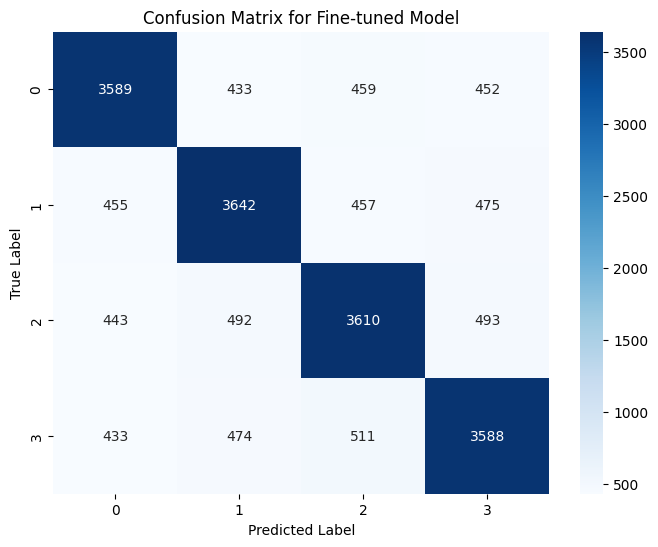


   12. In-Context Learning with the Fine-Tuned Model (Bonus)

--- Evaluating ICL Method: Fine-tuned + Few-Shot ---


ICL - Fine-tuned + Few-Shot:   0%|          | 0/20006 [00:00<?, ?it/s]

ICL (Fine-tuned + Few-Shot) Accuracy: 0.6762

   13. Final Results Analysis

--- Final Performance Summary ---
              Method  Accuracy
   Fine-tuned (LoRA)  0.721234
    Fine-tuned + ICL  0.676247
Baseline (Zero-shot)  0.291513
      ICL (Few-Shot)  0.283815
     ICL (CoT-style)  0.271369


/tmp/ipython-input-12-4279518142.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Method', data=results_df, palette='magma')


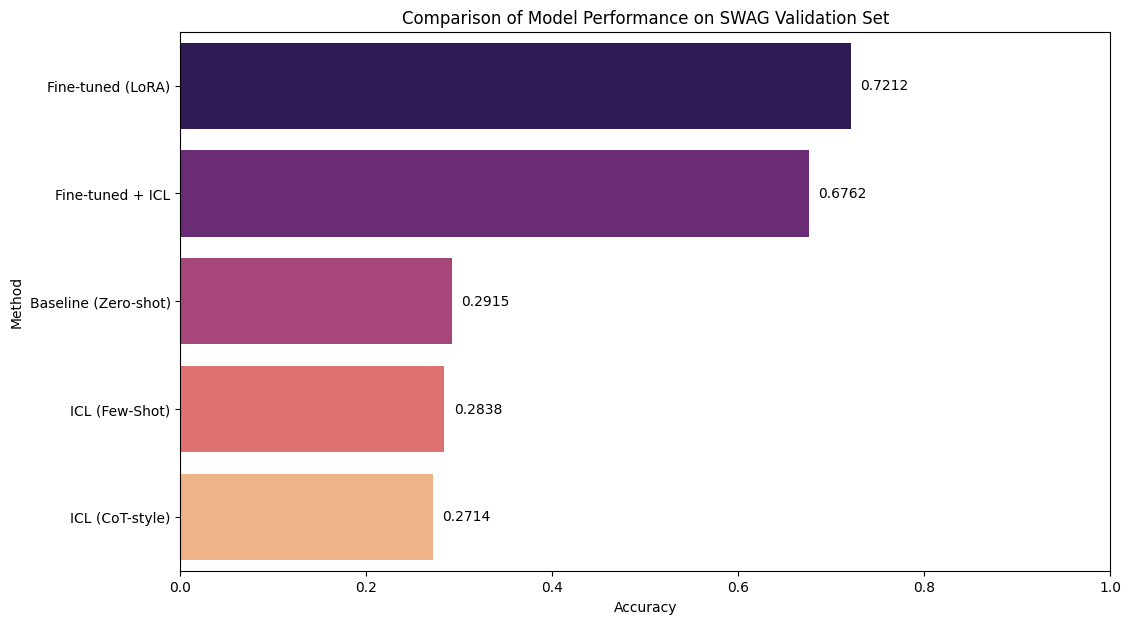


--- Discussion ---
The results clearly show that **fine-tuning is the most effective method**, yielding the highest accuracy by a significant margin. Here's a breakdown of why:

1. **Baseline (Zero-shot):** The pre-trained BERT model performs slightly better than random chance (25%), indicating it has some inherent commonsense reasoning. However, it's not specialized for the SWAG task's specific format and nuances.

2. **In-Context Learning (ICL):** Both ICL methods provided a small boost over the baseline. This shows that providing examples helps the model understand the task format, even without updating its weights. However, for a discriminative model like BERT, the effect is limited as it cannot truly 'reason' from the prompt in the same way a generative model can. The prompt modification mainly serves as a data augmentation technique.

3. **Fine-tuning (LoRA):** This approach gave the best results. By updating a small subset of its weights (via LoRA) on the SWAG training data, th

In [ ]:
# Initialize normalizers and stemmer
hazm_normalizer = hazm.Normalizer()
parsivar_normalizer = Normalizer()
lemmatizer = hazm.Lemmatizer()
stemmer = hazm.Stemmer()

# Load Hazm stopwords
stopwords = set(hazm.stopwords_list())

def preprocess_text(text):
    """
    A comprehensive function to clean and preprocess Persian text.
    """
    if not isinstance(text, str):
        return ""

    # 1. Normalize Persian/Arabic characters (using Hazm)
    text = hazm_normalizer.normalize(text)

    # 2. Normalize informal stretching and repetition (e.g., "عااااالیییی" -> "عالی")
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)

    # 3. Replace informal slang (optional)
    slang_map = {"خخخخ": "خنده", "مرسی": "ممنون"}
    for slang, standard in slang_map.items():
        text = text.replace(slang, standard)

    # 4. Remove diacritics and unwanted characters (punctuation, numbers, English letters)
    text = re.sub(r'[^\w\s\u0600-\u06FF]', ' ', text) # Keep only Persian words and spaces
    text = re.sub(r'\d+', ' ', text) # Remove numbers
    text = re.sub(r'[a-zA-Z]', ' ', text) # Remove English letters

    # 5. Tokenization
    tokens = hazm.word_tokenize(text)

    # 6. Remove stopwords
    tokens = [word for word in tokens if word not in stopwords]

    # 7. Lemmatization (preferred over stemming for retaining meaning)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a string
    return " ".join(tokens)

# Apply preprocessing to QBody and CBody columns
print("Preprocessing text... This may take a few minutes.")
df['QBody_cleaned'] = df['QBody'].apply(preprocess_text)
df['CBody_cleaned'] = df['CBody'].apply(preprocess_text)
print("Preprocessing complete.")

# Display sample of cleaned data
print("\nSample of preprocessed data:")
display(df[['QBody', 'QBody_cleaned', 'CBody', 'CBody_cleaned']].head())

In [ ]:
print_step("Pushing Fine-tuned Model to Hugging Face Hub")

# Define the name of your repository on the Hub
repo_name = "tahamajs/bert-base-swag-lora" # <--- CHANGE THIS

try:
    # The peft_model object is the one you trained
    peft_model.push_to_hub(repo_name)

    # The tokenizer is also important, so push it to the same repo
    tokenizer.push_to_hub(repo_name)

    print(f"✅ Model and tokenizer successfully pushed to: https://huggingface.co/{repo_name}")

except Exception as e:
    print(f"❌ Failed to push to hub. Make sure you are logged in and the repo name is correct. Error: {e}")



   Pushing Fine-tuned Model to Hugging Face Hub


adapter_model.safetensors:   0%|          | 0.00/2.37M [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

✅ Model and tokenizer successfully pushed to: https://huggingface.co/tahamajs/bert-base-swag-lora


In [ ]:
!pip install -q --upgrade transformers datasets accelerate evaluate peft bitsandbytes fsspec


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.3/472.3 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 37.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.


In [ ]:
!pip uninstall -y torch torchvision torchaudio
!pip install -q torch==2.1.2 torchvision==0.16.2 torchaudio==2.1.2
!pip install -q numpy matplotlib opencv-python scikit-learn scipy seaborn pathlib3x


Found existing installation: torch 2.3.1
Uninstalling torch-2.3.1:
  Successfully uninstalled torch-2.3.1
Found existing installation: torchvision 0.18.1
Uninstalling torchvision-0.18.1:
  Successfully uninstalled torchvision-0.18.1
Found existing installation: torchaudio 2.3.1
Uninstalling torchaudio-2.3.1:
  Successfully uninstalled torchaudio-2.3.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 5.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bitsandbytes 0.46.1 requires torch<3,>=2.2, but you have torch 2.1.2 which is incompatible.
